In [139]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as snsimport 
import numpy as np
import math


In [2]:
approval_date_1990_1999_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-approval-date-1990-1999.csv'
approval_date_2000_feb_2012_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'

registration_date_mar_2012_dec_2014_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
registration_date_jan_2015_dec_2016_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
registration_date_jan_2017_path = r'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview/data/HDB/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

In [3]:
approval_date_1990_1999_df = pd.read_csv(approval_date_1990_1999_path)
approval_date_2000_feb_2012_df = pd.read_csv(approval_date_2000_feb_2012_path)

registration_date_mar_2012_dec_2014_df = pd.read_csv(registration_date_mar_2012_dec_2014_path)
registration_date_jan_2015_dec_2016_df = pd.read_csv(registration_date_jan_2015_dec_2016_path)
registration_date_jan_2017_df = pd.read_csv(registration_date_jan_2017_path)

Exploratory Data Analysis
1. Structural Investigation
Check for

- predictor and target
- Missing values
- Duplicated values
- Type of variable, Data type and Variable Category
- Categorical Variable Cardinality

In [4]:
approval_date_1990_1999_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [5]:
# Check the shape of the dataframe
print(approval_date_1990_1999_df.shape)
print('---------------------------------------')
# Check the datatype information of the features
print(approval_date_1990_1999_df.info())
print('---------------------------------------')
# Check for missing values in each column
print(approval_date_1990_1999_df.isnull().sum())
print('---------------------------------------')
# check for missing values in each column as a percentage of whole dataset
print((approval_date_1990_1999_df.isnull().sum() / approval_date_1990_1999_df.shape[0]) * 100)
print('---------------------------------------')
# Check for duplicates in the dataframe
print(approval_date_1990_1999_df.duplicated().sum())
print('---------------------------------------')

(287200, 10)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287200 entries, 0 to 287199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287200 non-null  object 
 1   town                 287200 non-null  object 
 2   flat_type            287200 non-null  object 
 3   block                287200 non-null  object 
 4   street_name          287200 non-null  object 
 5   storey_range         287200 non-null  object 
 6   floor_area_sqm       287200 non-null  float64
 7   flat_model           287200 non-null  object 
 8   lease_commence_date  287200 non-null  int64  
 9   resale_price         287200 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
---------------------------------------
month                  0
town                   0
flat_type              0
block                  0
street_name     

In [6]:
# approval_date_1990_1999_duplicated_df = approval_date_1990_1999_df[approval_date_1990_1999_df.duplicated()]
# print(approval_date_1990_1999_duplicated_df.shape)
# approval_date_1990_1999_duplicated_df[(approval_date_1990_1999_duplicated_df['town']=='GEYLANG') & (approval_date_1990_1999_duplicated_df['flat_model']=='STANDARD')]

# Show all rows that are duplicates
approval_date_1990_1999_df_duplicates = approval_date_1990_1999_df[approval_date_1990_1999_df.duplicated(keep=False)]
print("Approval date 1990 1999 duplicate rows:")
approval_date_1990_1999_df_duplicates.head(20)

Approval date 1990 1999 duplicate rows:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
672,1990-01,GEYLANG,3 ROOM,47,CIRCUIT RD,01 TO 03,56.0,STANDARD,1969,18000
673,1990-01,GEYLANG,3 ROOM,47,CIRCUIT RD,01 TO 03,56.0,STANDARD,1969,18000
725,1990-01,HOUGANG,3 ROOM,308,HOUGANG AVE 5,10 TO 12,67.0,NEW GENERATION,1983,47000
726,1990-01,HOUGANG,3 ROOM,308,HOUGANG AVE 5,10 TO 12,67.0,NEW GENERATION,1983,47000
842,1990-01,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64.0,IMPROVED,1976,23400
843,1990-01,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64.0,IMPROVED,1976,23400
851,1990-01,JURONG WEST,3 ROOM,172,BOON LAY DR,10 TO 12,70.0,IMPROVED,1974,32900
854,1990-01,JURONG WEST,3 ROOM,172,BOON LAY DR,10 TO 12,70.0,IMPROVED,1974,32900
856,1990-01,JURONG WEST,3 ROOM,185,BOON LAY AVE,22 TO 24,59.0,IMPROVED,1975,22500
862,1990-01,JURONG WEST,3 ROOM,185,BOON LAY AVE,22 TO 24,59.0,IMPROVED,1975,22500


### Approval_date_1990_1999_df structural observation
- There are 10 columns and 287,200 rows 
- There are 3 datatypes : int64, float64 and object
- There are 826 duplicated rows 
    - The chances of selling the house at the same price are rare. Hence, we will assume it to be duplicated entries.

In [7]:
approval_date_2000_feb_2012_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [8]:
# Check the shape of the dataframe
print(approval_date_2000_feb_2012_df.shape)
print('---------------------------------------')
# Check the datatype information of the features
print(approval_date_2000_feb_2012_df.info())
print('---------------------------------------')
# Check for missing values in each column
print(approval_date_2000_feb_2012_df.isnull().sum())
print('---------------------------------------')
# check for missing values in each column as a percentage of whole dataset
print((approval_date_2000_feb_2012_df.isnull().sum() / approval_date_2000_feb_2012_df.shape[0]) * 100)
print('---------------------------------------')
# Check for duplicates in the dataframe
print(approval_date_2000_feb_2012_df.duplicated().sum())
print('---------------------------------------')

(369651, 10)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB
None
---------------------------------------
month                  0
town                   0
flat_type              0
block                  0
street_name     

In [9]:
approval_date_2000_feb_2012_df_duplicates = approval_date_2000_feb_2012_df[approval_date_2000_feb_2012_df.duplicated(keep=False)]
print("Approval date 2000 Feb 2012 duplicate rows:")
approval_date_2000_feb_2012_df_duplicates.head(20)

Approval date 2000 Feb 2012 duplicate rows:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
21,2000-01,ANG MO KIO,3 ROOM,443,ANG MO KIO AVE 10,07 TO 09,67.0,New Generation,1979,162000.0
22,2000-01,ANG MO KIO,3 ROOM,443,ANG MO KIO AVE 10,07 TO 09,67.0,New Generation,1979,162000.0
175,2000-01,BEDOK,3 ROOM,32,CHAI CHEE AVE,13 TO 15,65.0,Improved,1974,165000.0
176,2000-01,BEDOK,3 ROOM,32,CHAI CHEE AVE,13 TO 15,65.0,Improved,1974,165000.0
284,2000-01,BEDOK,4 ROOM,421,BEDOK NTH RD,13 TO 15,92.0,New Generation,1979,275000.0
285,2000-01,BEDOK,4 ROOM,421,BEDOK NTH RD,13 TO 15,92.0,New Generation,1979,275000.0
867,2000-01,CLEMENTI,3 ROOM,518,WEST COAST RD,10 TO 12,68.0,New Generation,1980,154000.0
868,2000-01,CLEMENTI,3 ROOM,518,WEST COAST RD,10 TO 12,68.0,New Generation,1980,154000.0
2326,2000-01,YISHUN,4 ROOM,249,YISHUN AVE 9,10 TO 12,84.0,Simplified,1985,195000.0
2327,2000-01,YISHUN,4 ROOM,249,YISHUN AVE 9,10 TO 12,84.0,Simplified,1985,195000.0


### Approval_date_2000_feb_2012_df structural observation
- There are 10 columns and 369,651rows 
- There are 3 datatypes : int64, float64 and object
- There are 513 duplicated rows 
    - The chances of selling the house at the same price are rare. Hence, we will assume it to be duplicated entries.
- Approval_date_1990_1999_df resale_price is int64 while Approval_date_2000_feb_2012_df is float64

In [10]:
registration_date_mar_2012_dec_2014_df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [11]:
# Check the shape of the dataframe
print(registration_date_mar_2012_dec_2014_df.shape)
print('---------------------------------------')
# Check the datatype information of the features
print(registration_date_mar_2012_dec_2014_df.info())
print('---------------------------------------')
# Check for missing values in each column
print(registration_date_mar_2012_dec_2014_df.isnull().sum())
print('---------------------------------------')
# check for missing values in each column as a percentage of whole dataset
print((registration_date_mar_2012_dec_2014_df.isnull().sum() / registration_date_mar_2012_dec_2014_df.shape[0]) * 100)
print('---------------------------------------')
# Check for duplicates in the dataframe
print(registration_date_mar_2012_dec_2014_df.duplicated().sum())
print('---------------------------------------')

(52203, 10)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB
None
---------------------------------------
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_

In [12]:
registration_date_mar_2012_dec_2014_df_duplicates = registration_date_mar_2012_dec_2014_df[registration_date_mar_2012_dec_2014_df.duplicated(keep=False)]
print("Registration date March 2012 Dec 2014 duplicate rows:")
registration_date_mar_2012_dec_2014_df_duplicates.head(20)

Registration date March 2012 Dec 2014 duplicate rows:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
336,2012-03,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,06 TO 10,67.0,New Generation,1985,341000.0
337,2012-03,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,06 TO 10,67.0,New Generation,1985,341000.0
2650,2012-04,BUKIT BATOK,3 ROOM,167,BT BATOK WEST AVE 8,01 TO 05,74.0,Model A,1984,333000.0
2651,2012-04,BUKIT BATOK,3 ROOM,167,BT BATOK WEST AVE 8,01 TO 05,74.0,Model A,1984,333000.0
3259,2012-04,JURONG EAST,3 ROOM,303,JURONG EAST ST 32,01 TO 05,67.0,New Generation,1983,330000.0
3260,2012-04,JURONG EAST,3 ROOM,303,JURONG EAST ST 32,01 TO 05,67.0,New Generation,1983,330000.0
4164,2012-04,WOODLANDS,3 ROOM,15,MARSILING LANE,01 TO 05,65.0,Improved,1976,280000.0
4165,2012-04,WOODLANDS,3 ROOM,15,MARSILING LANE,01 TO 05,65.0,Improved,1976,280000.0
4420,2012-04,YISHUN,3 ROOM,740,YISHUN AVE 5,06 TO 10,67.0,New Generation,1985,341000.0
4421,2012-04,YISHUN,3 ROOM,740,YISHUN AVE 5,06 TO 10,67.0,New Generation,1985,341000.0


### Registration_date_mar_2012_dec_2014_df structural observation
- There are 10 columns and 52,203 rows 
- There are 3 datatypes : int64, float64 and object
- There are 248 duplicated rows 
    - The chances of selling the house at the same price are rare. Hence, we will assume it to be duplicated entries.
- Approval_date_1990_1999_df resale_price is int64 while Approval_date_2000_feb_2012_df is float64
Registration_date_mar_2012_dec_2014_df is float64

In [13]:
registration_date_jan_2015_dec_2016_df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [14]:
# Check the shape of the dataframe
print(registration_date_jan_2015_dec_2016_df.shape)
print('---------------------------------------')
# Check the datatype information of the features
print(registration_date_jan_2015_dec_2016_df.info())
print('---------------------------------------')
# Check for missing values in each column
print(registration_date_jan_2015_dec_2016_df.isnull().sum())
print('---------------------------------------')
# check for missing values in each column as a percentage of whole dataset
print((registration_date_jan_2015_dec_2016_df.isnull().sum() / registration_date_jan_2015_dec_2016_df.shape[0]) * 100)
print('---------------------------------------')
# Check for duplicates in the dataframe
print(registration_date_jan_2015_dec_2016_df.duplicated().sum())
print('---------------------------------------')

(37153, 11)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB
None
---------------------------------------
month                  0
town                   0
flat_type              0
block  

In [15]:
registration_date_jan_2015_dec_2016_df_duplicates = registration_date_jan_2015_dec_2016_df[registration_date_jan_2015_dec_2016_df.duplicated(keep=False)]
print("Registration date Jan 2015 Dec 2016 duplicate rows:")
registration_date_jan_2015_dec_2016_df_duplicates.head(20)

Registration date Jan 2015 Dec 2016 duplicate rows:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
660,2015-01,KALLANG/WHAMPOA,3 ROOM,57,GEYLANG BAHRU,16 TO 18,65.0,Improved,1974,58,315000.0
661,2015-01,KALLANG/WHAMPOA,3 ROOM,57,GEYLANG BAHRU,16 TO 18,65.0,Improved,1974,58,315000.0
2165,2015-02,TAMPINES,3 ROOM,403,TAMPINES ST 41,07 TO 09,69.0,Improved,1985,69,350000.0
2166,2015-02,TAMPINES,3 ROOM,403,TAMPINES ST 41,07 TO 09,69.0,Improved,1985,69,350000.0
3895,2015-04,BEDOK,4 ROOM,701,BEDOK RESERVOIR RD,10 TO 12,93.0,New Generation,1980,64,400000.0
3896,2015-04,BEDOK,4 ROOM,701,BEDOK RESERVOIR RD,10 TO 12,93.0,New Generation,1980,64,400000.0
4245,2015-04,CLEMENTI,3 ROOM,714,CLEMENTI WEST ST 2,10 TO 12,67.0,New Generation,1980,64,300000.0
4246,2015-04,CLEMENTI,3 ROOM,714,CLEMENTI WEST ST 2,10 TO 12,67.0,New Generation,1980,64,300000.0
5492,2015-05,BEDOK,3 ROOM,409,BEDOK NTH AVE 2,07 TO 09,68.0,New Generation,1980,63,340000.0
5493,2015-05,BEDOK,3 ROOM,409,BEDOK NTH AVE 2,07 TO 09,68.0,New Generation,1980,63,340000.0


### Registration_date_jan_2015_dec_2016_df structural observation
- There are 11 columns and 37,153 rows 
- There are 3 datatypes : int64, float64 and object
- There are 24 duplicated rows 
    - The chances of selling the house at the same price are rare. Hence, we will assume it to be duplicated entries.
- Approval_date_1990_1999_df resale_price is int64 while Approval_date_2000_feb_2012_df is float64,
Registration_date_mar_2012_dec_2014_df is float64,
registration_date_jan_2015_dec_2016_df is float64
- From registration_date_jan_2015_dec_2016_df, there is an extra column callled 'remaining_lease'

In [16]:
registration_date_jan_2017_df 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
80370,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
80371,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
80372,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


In [17]:
# Check the shape of the dataframe
print(registration_date_jan_2017_df.shape)
print('---------------------------------------')
# Check the datatype information of the features
print(registration_date_jan_2017_df.info())
print('---------------------------------------')
# Check for missing values in each column
print(registration_date_jan_2017_df.isnull().sum())
print('---------------------------------------')
# check for missing values in each column as a percentage of whole dataset
print((registration_date_jan_2017_df.isnull().sum() / registration_date_jan_2017_df .shape[0]) * 100)
print('---------------------------------------')
# Check for duplicates in the dataframe
print(registration_date_jan_2017_df.duplicated().sum())
print('---------------------------------------')

(80374, 11)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                80374 non-null  object 
 1   town                 80374 non-null  object 
 2   flat_type            80374 non-null  object 
 3   block                80374 non-null  object 
 4   street_name          80374 non-null  object 
 5   storey_range         80374 non-null  object 
 6   floor_area_sqm       80374 non-null  float64
 7   flat_model           80374 non-null  object 
 8   lease_commence_date  80374 non-null  int64  
 9   remaining_lease      80374 non-null  object 
 10  resale_price         80374 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.7+ MB
None
---------------------------------------
month                  0
town                   0
flat_type              0
block  

In [18]:
registration_date_jan_2017_df_duplicates = registration_date_jan_2017_df[registration_date_jan_2017_df.duplicated(keep=False)]
print("Registration date Jan 2017 duplicate rows:")
registration_date_jan_2017_df_duplicates.head(20)

Registration date Jan 2017 duplicate rows:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
590,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
671,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0


### Registration_date_jan_2017_df structural observation
- There are 11 columns and 80,374 rows 
- There are 3 datatypes : int64, float64 and object
- There are 210 duplicated rows 
    - The chances of selling the house at the same price are rare. Hence, we will assume it to be duplicated entries.
- Approval_date_1990_1999_df resale_price is int64 while Approval_date_2000_feb_2012_df is float64,
Registration_date_mar_2012_dec_2014_df is float64,
registration_date_jan_2015_dec_2016_df is float64,
Registration_date_jan_2017_df is float64 
- From registration_date_jan_2015_dec_2016_df and Registration_date_jan_2017_df there is an extra column callled 'remaining_lease'
- Registration_date_jan_2017_df 'remaining_lease' is object datatype

TODO: 
1) approval_date_1990_1999_df 
- Remove Duplicates DONE
- Standarise 'resale_price' datatypes DONE
- new column 'remaining_lease' with 'int64' datatype 
- split the date into month and year 

2) approval_date_2000_feb_2012_df
- remove duplicates 
- Standarise 'resale_price' datatypes
- new column 'remaining_lease' with 'int64' datatype
- split the date into month and year 

3) registration_date_mar_2012_dec_2014_df
- remove duplicates 
- Standarise 'resale_price' datatypes
- new column 'remaining_lease' with 'int64' datatype
- split the date into month and year 

4) registration_date_jan_2015_dec_2016_df
- remove duplicates 
- Standarise 'resale_price' datatypes
- new column 'remaining_lease' with 'int64' datatype
- split the date into month and year 

5) registration_date_jan_2017_df 
- remove duplicates 
- Standarise 'resale_price' datatypes
- new column 'remaining_lease' with 'int64' datatype
- split the date into month and year 




## Cleaned Dataframes

In [25]:
import sys
import seaborn as sns
sys.path.insert(0,'/Users/user/Documents/htx_xdata/htx_xdata_tech_interview')

from src.preprocess import preprocess_pipeline

In [20]:
approval_date_1990_1999_df_cleaned = preprocess_pipeline(approval_date_1990_1999_df)
approval_date_2000_feb_2012_df_cleaned= preprocess_pipeline(approval_date_2000_feb_2012_df)
registration_date_mar_2012_dec_2014_df_cleaned = preprocess_pipeline(registration_date_mar_2012_dec_2014_df)
registration_date_jan_2015_dec_2016_df_cleaned = preprocess_pipeline(registration_date_jan_2015_dec_2016_df)
registration_date_jan_2017_df_cleaned = preprocess_pipeline(registration_date_jan_2017_df)

Duplicates :826
After dropping Duplicates :0
Column : resale_price datatype before converting : int64
Column : resale_price datatype after converting : float64
remaining_lease Column added
-----------------------------------
Duplicates :513
After dropping Duplicates :0
Column : resale_price datatype before converting : float64
Column : resale_price datatype after converting : float64
remaining_lease Column added
-----------------------------------
Duplicates :248
After dropping Duplicates :0
Column : resale_price datatype before converting : float64
Column : resale_price datatype after converting : float64
remaining_lease Column added
-----------------------------------
Duplicates :24
After dropping Duplicates :0
Column : resale_price datatype before converting : float64
Column : resale_price datatype after converting : float64
-----------------------------------
Duplicates :210
After dropping Duplicates :0
Column : resale_price datatype before converting : float64
Column : resale_pric

## 2. Content Investigation, Quality Checks and Distribution checks
- approval_date_1990_1999_df_cleaned


In [21]:
approval_date_1990_1999_df_cleaned

# Get the columns in list
approval_date_1990_1999_df_cleaned_columns = approval_date_1990_1999_df_cleaned.columns
#Get categorical features list 
approval_date_1990_1999_df_cleaned_cat_features_list =[feature for feature in approval_date_1990_1999_df_cleaned_columns if approval_date_1990_1999_df_cleaned[feature].dtypes == 'O']

In [22]:
approval_date_1990_1999_df_cleaned_cat_features_list

['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

In [24]:
#Get all the numerical featues
approval_date_1990_1999_df_numerical_features_list =[feature for feature in approval_date_1990_1999_df_cleaned_columns if approval_date_1990_1999_df_cleaned[feature].dtypes != 'O']
approval_date_1990_1999_df_numerical_features_list

['month',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'month_only',
 'year_only',
 'remaining_lease']

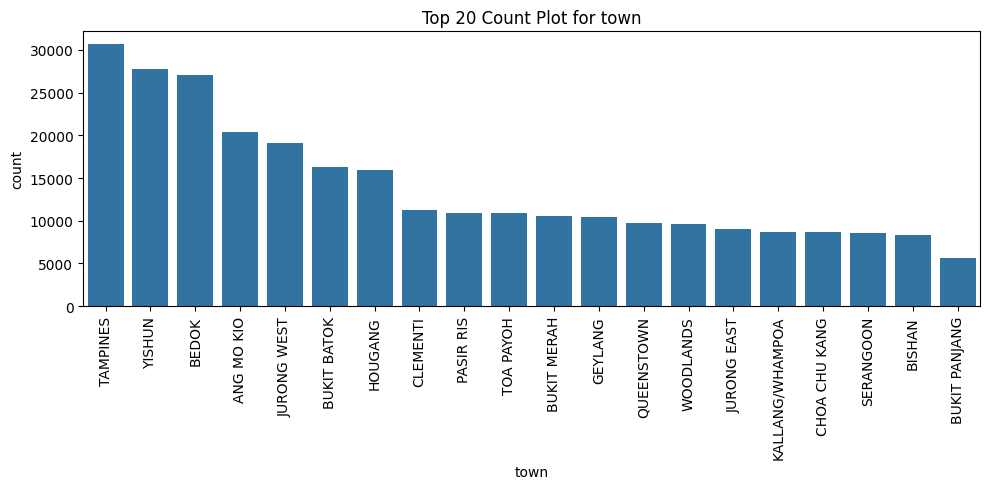

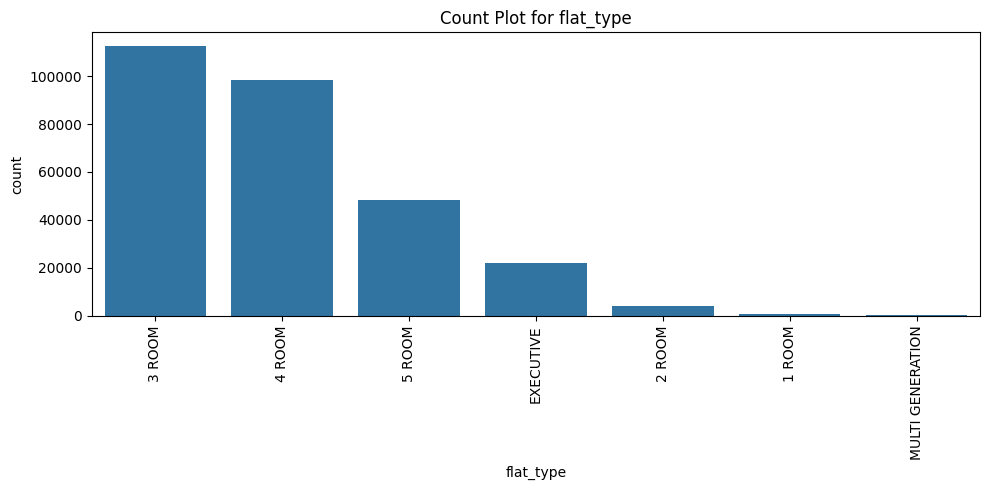

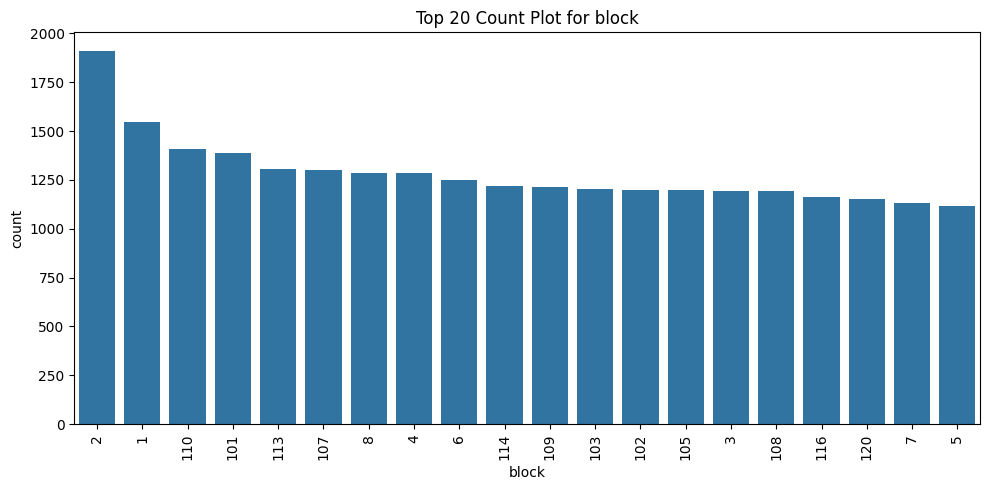

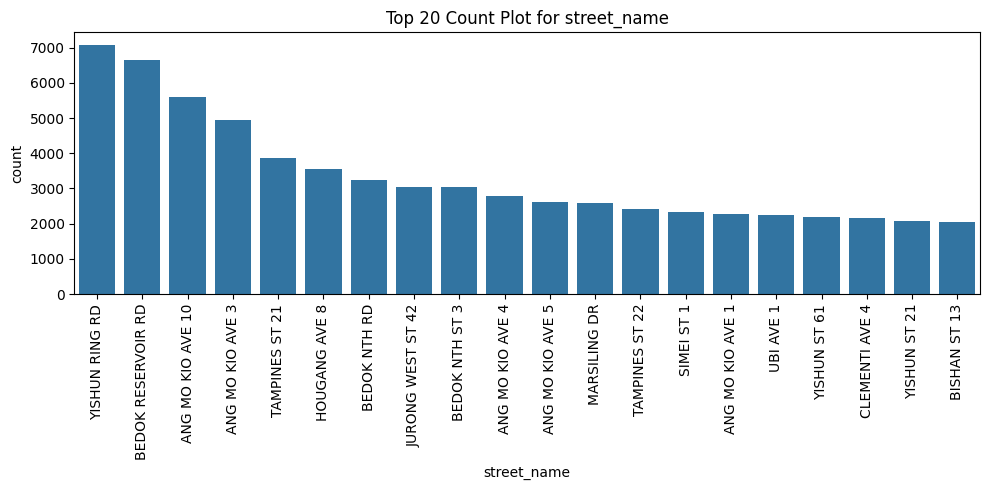

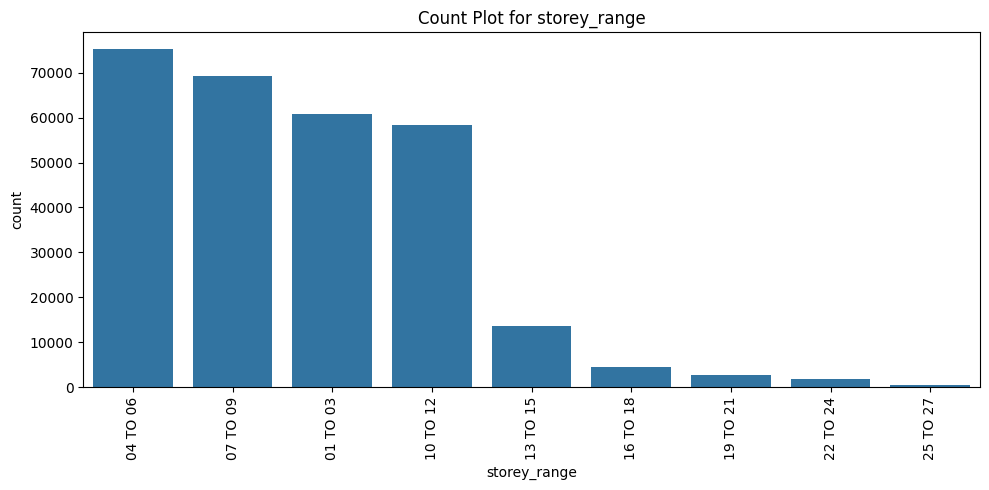

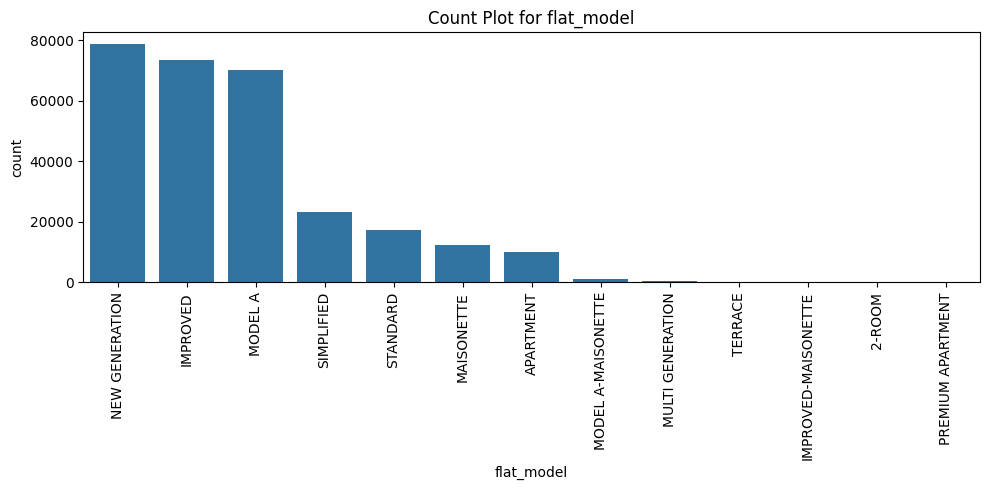

In [137]:
TOP_N = 20

for cat_columns in approval_date_1990_1999_df_cleaned_cat_features_list:
    
    counts = approval_date_1990_1999_df_cleaned[cat_columns].value_counts()
    n_unique = counts.shape[0]

    plt.figure(figsize=(10, 5))

    if n_unique > TOP_N:
        top_categories = counts.head(TOP_N).index

        sns.countplot(
            x=cat_columns,
            data=approval_date_1990_1999_df_cleaned[
                approval_date_1990_1999_df_cleaned[cat_columns].isin(top_categories)
            ],
            order=top_categories
        )
        plt.title(f'Top {TOP_N} Count Plot for {cat_columns}')
    else:
        sns.countplot(
            x=cat_columns,
            data=approval_date_1990_1999_df_cleaned,
            order=counts.index
        )
        plt.title(f'Count Plot for {cat_columns}')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Print counts
    # print(counts)
    # print("Total count:", counts.sum())


### Approval_date_1990_1999_df Categorical Obervation 
- From 1990 to 1999, the top 5 popular towns are 
 1) TAMPINES           30628
 2) YISHUN             27721
 3) BEDOK              27072
 4) ANG MO KIO         20390
 5) JURONG WEST        19114

- Top 5 popular streets are :  
1) YISHUN RING RD        7079
2) BEDOK RESERVOIR RD    6655
3) ANG MO KIO AVE 10     5604
4) ANG MO KIO AVE 3      4956
5) TAMPINES ST 21        3853

- Most commont flat type sold : 
1) 3 ROOM              112603
2) 4 ROOM               98347
3) 5 ROOM               48142
4) EXECUTIVE            22087
5) 2 ROOM                4112

- Popular floor range 
1) 04 TO 06    75219
2) 07 TO 09    69189
3) 01 TO 03    60822
4) 10 TO 12    58266
5) 13 TO 15    13656


- Top flat model 
1) NEW GENERATION         78646
2) IMPROVED               73300
3) MODEL A                70234
4) SIMPLIFIED             23211
5) STANDARD               17323

### Approval_date_1990_1999_df Numerical Obervation 
- More houses are sold closer to 1999
1) 1999-03-01    6442
2) 1999-06-01    5835
3) 1998-10-01    5690
4) 1999-04-01    5681
5) 1999-05-01    5655

- Popular floor area 
1) 67.0     26690
2) 104.0    17795
3) 84.0     15171
4) 68.0     14274
5) 73.0     11096

- Lease commence date
1) 1985    38660
2) 1984    27797
3) 1988    21225
4) 1987    18432
5) 1978    18167

- popular resale price
1) 160000.0    2679
2) 47000.0     2599
3) 150000.0    2550
4) 180000.0    2532
5) 170000.0    2406

- Popular month to sell
1) 7     25675
2) 10    25627
3) 8     24726
4) 11    24632
5) 3     24536

-  Years where houses are sold the most 
1) 1999    57601
2) 1998    50969
3) 1996    34845
4) 1997    31678
5) 1995    27242


- Sold houses remaining leases
1) 89     20493
2) 88     20096
3) 85     18576
4) 86     18497
5) 87     18444







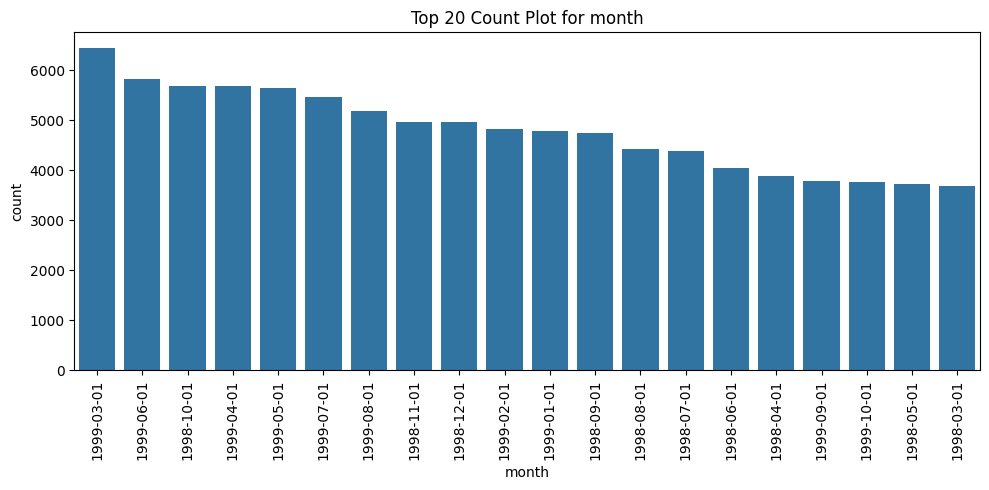

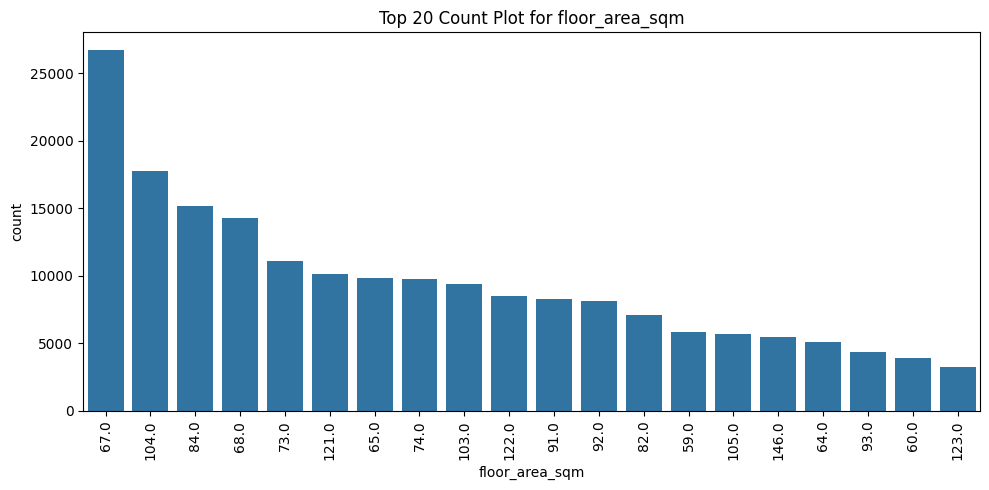

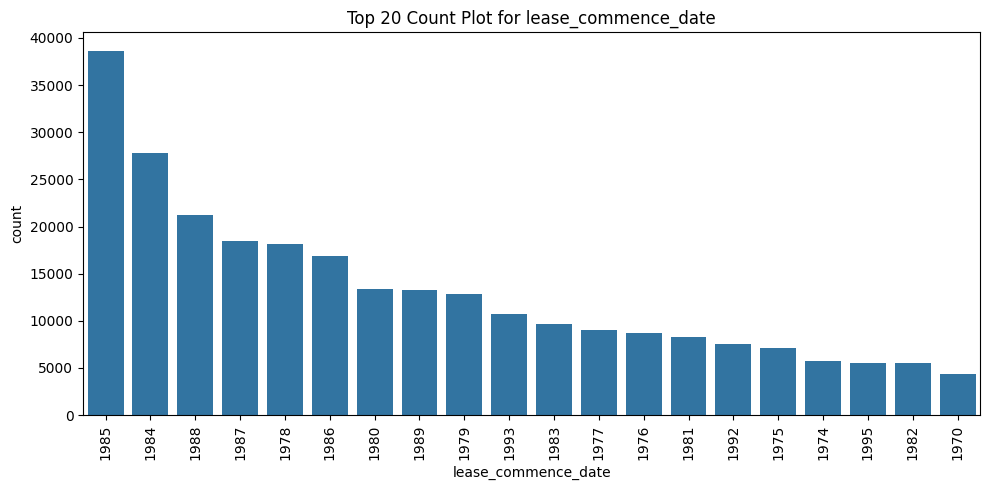

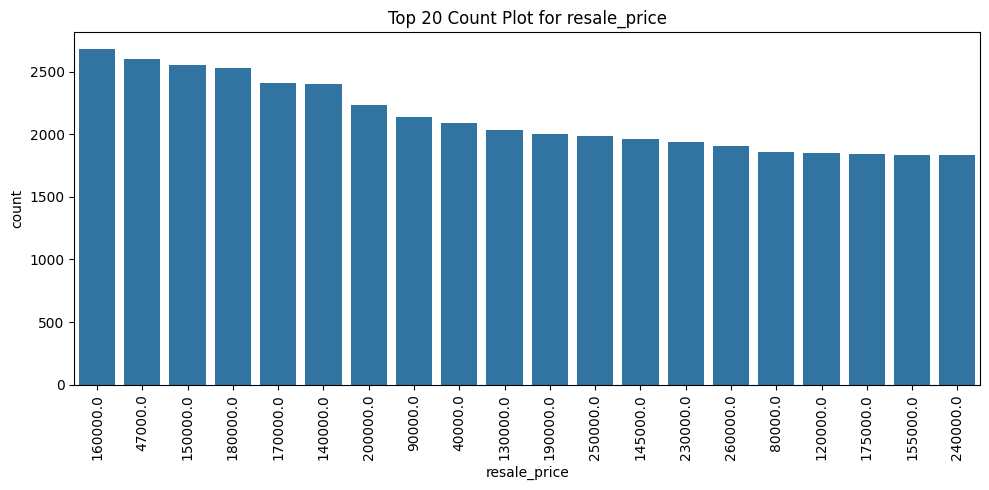

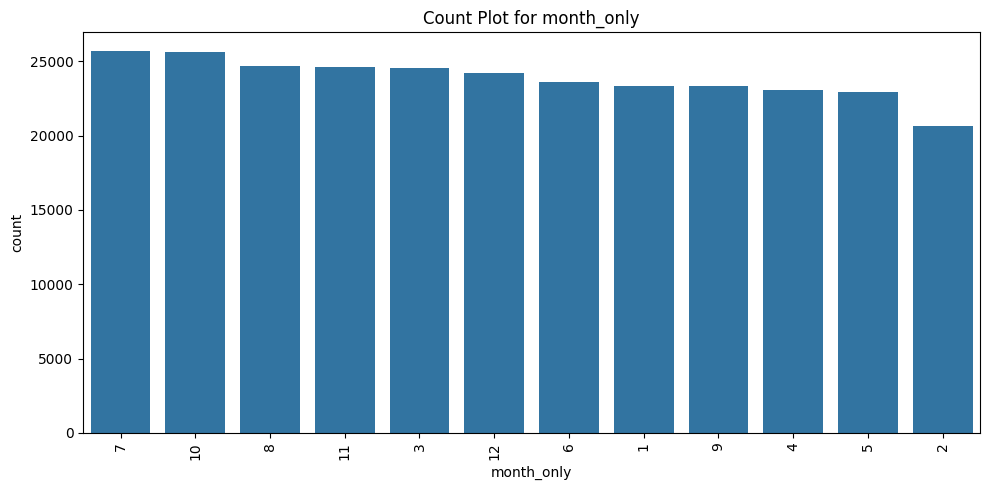

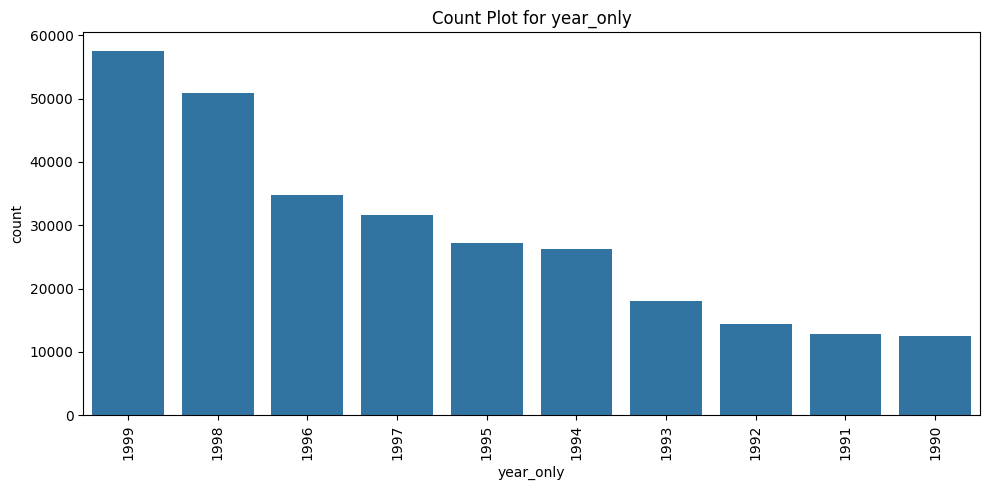

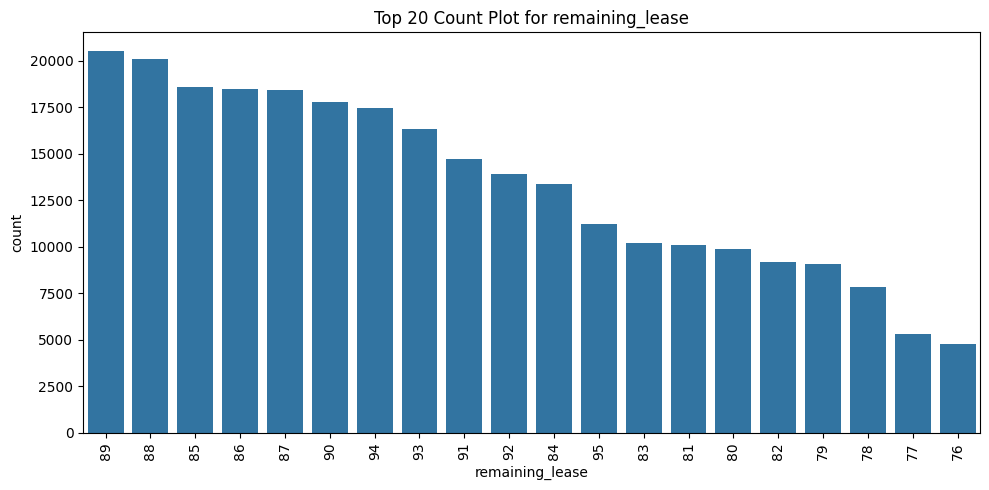

In [138]:
TOP_N = 20

for cat_columns in approval_date_1990_1999_df_numerical_features_list:
    
    counts = approval_date_1990_1999_df_cleaned[cat_columns].value_counts()
    n_unique = counts.shape[0]

    plt.figure(figsize=(10, 5))

    if n_unique > TOP_N:
        top_categories = counts.head(TOP_N).index

        sns.countplot(
            x=cat_columns,
            data=approval_date_1990_1999_df_cleaned[
                approval_date_1990_1999_df_cleaned[cat_columns].isin(top_categories)
            ],
            order=top_categories
        )
        plt.title(f'Top {TOP_N} Count Plot for {cat_columns}')
    else:
        sns.countplot(
            x=cat_columns,
            data=approval_date_1990_1999_df_cleaned,
            order=counts.index
        )
        plt.title(f'Count Plot for {cat_columns}')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # # Print counts
    # print(counts)
    # print("Total count:", counts.sum())


### Plot Histogram for numercial variables

Mean: 93.39315440647546, Median: 91.0, Mode: 0    67.0
Name: floor_area_sqm, dtype: float64, Min: 28.0, Max: 307.0
Skewness: 0.5316369930802899
Kurtosis: -0.4186193476964468
Variance: 748.3894784071769
Standard Deviation: 27.356708106188083
Range: 279.0
Interquartile Range: 45.0


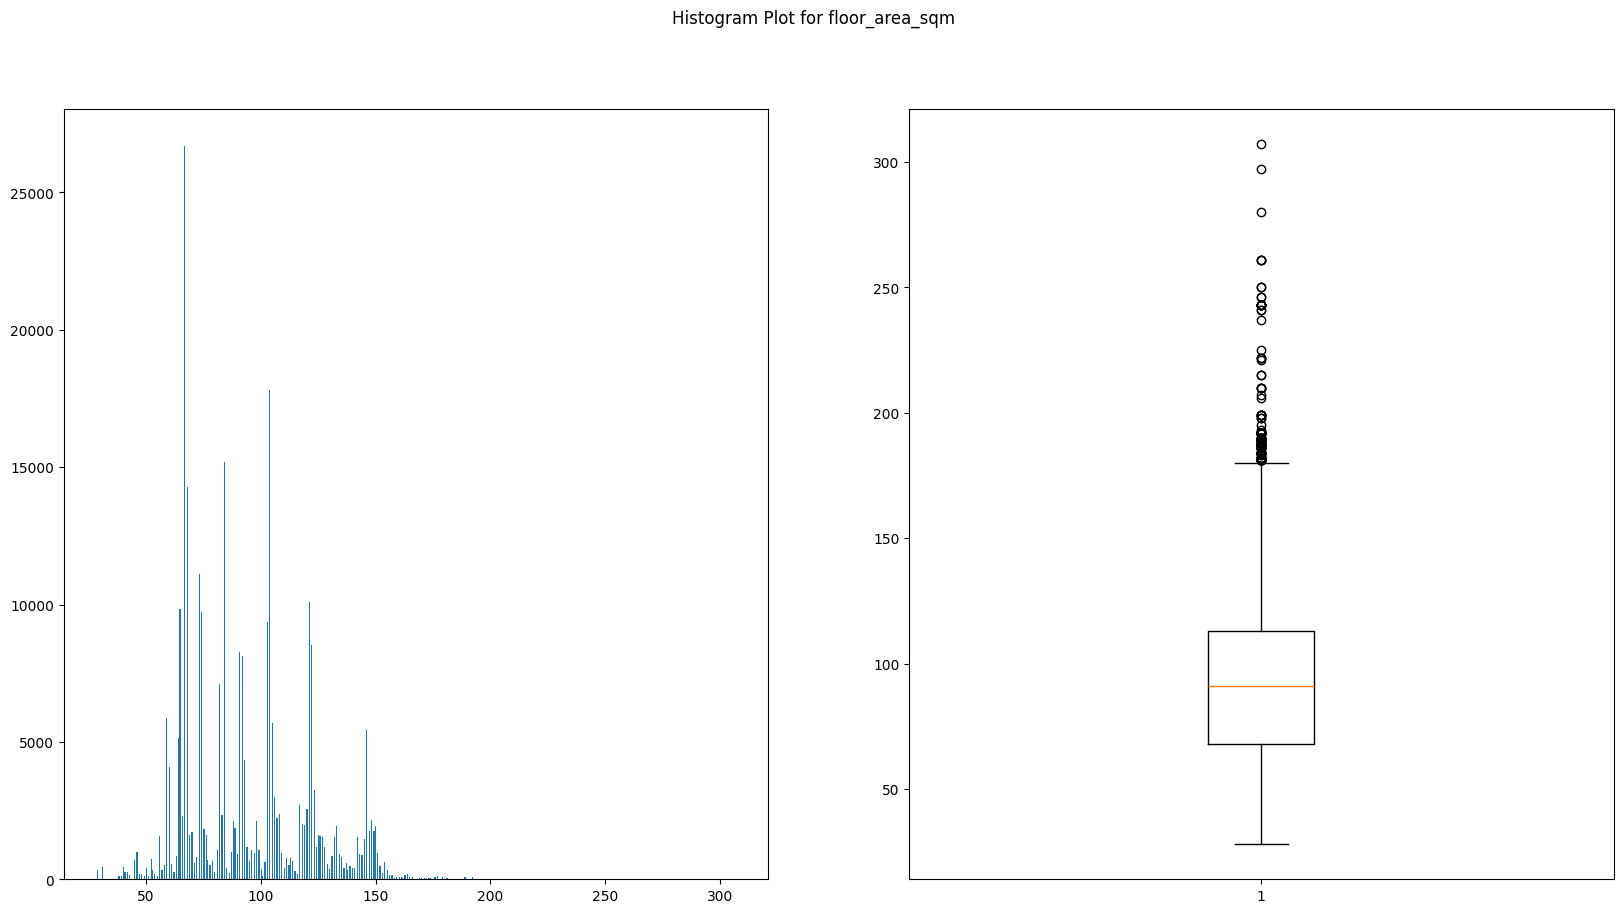

Mean: 1983.2133084707411, Median: 1984.0, Mode: 0    1985
Name: lease_commence_date, dtype: int64, Min: 1967, Max: 1997
Skewness: -0.3557853895388636
Kurtosis: -0.1872895863896602
Variance: 37.000359107724236
Standard Deviation: 6.082792048699695
Range: 30
Interquartile Range: 8.0


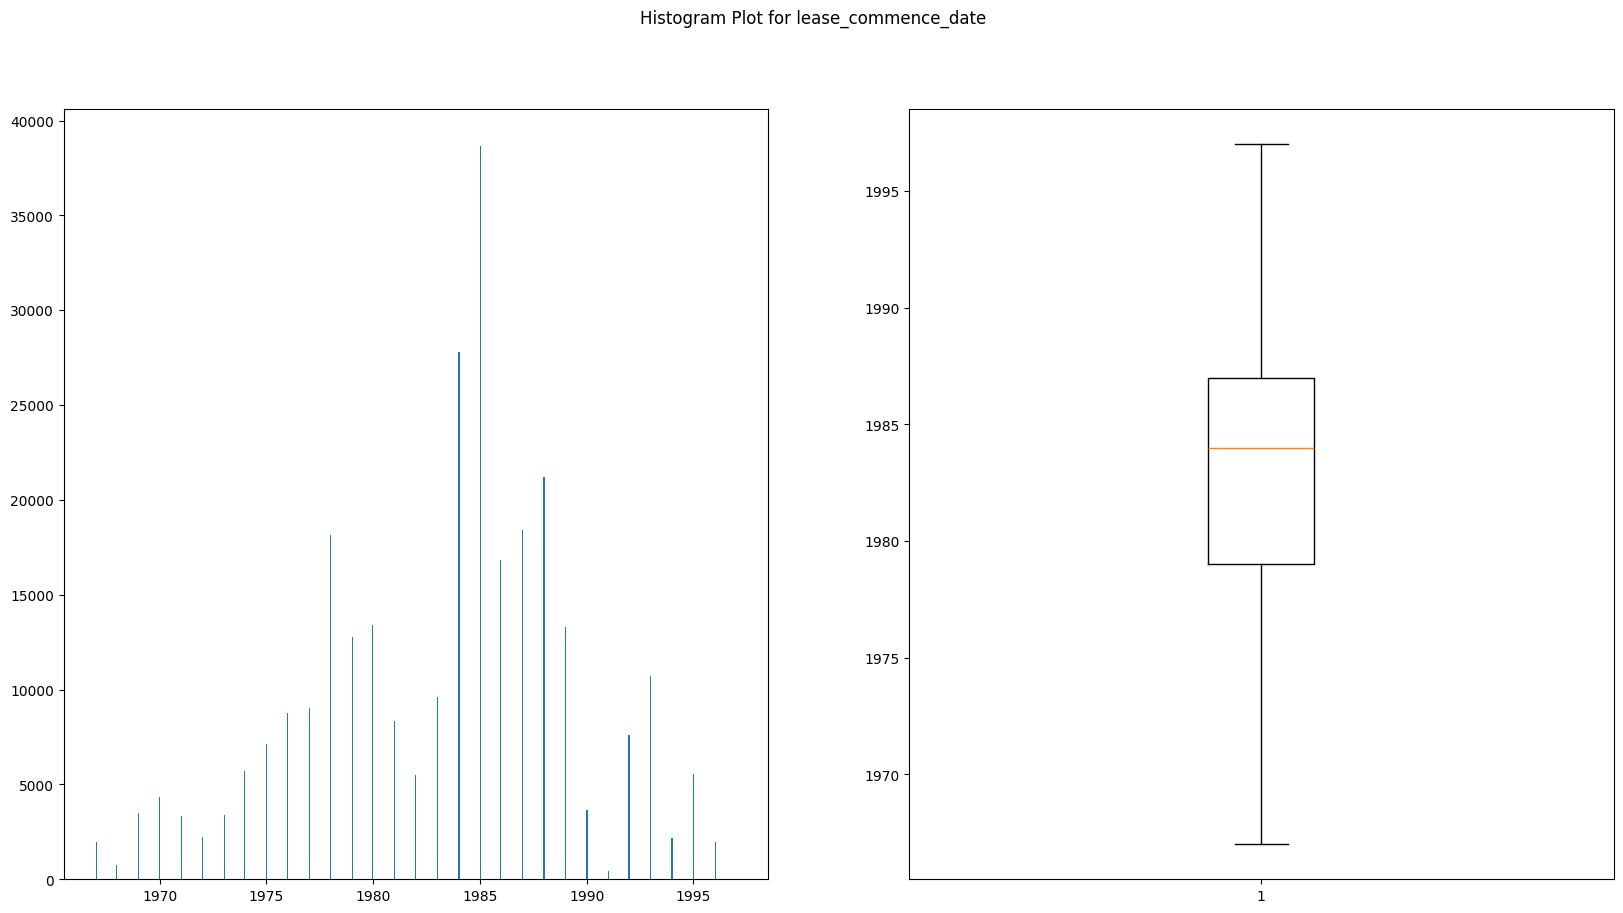

Mean: 219718.11899823308, Median: 195000.0, Mode: 0    160000.0
Name: resale_price, dtype: float64, Min: 5000.0, Max: 900000.0
Skewness: 0.7528818315621694
Kurtosis: 0.1736049603892562
Variance: 16419610643.388853
Standard Deviation: 128139.02857205081
Range: 895000.0
Interquartile Range: 171000.0


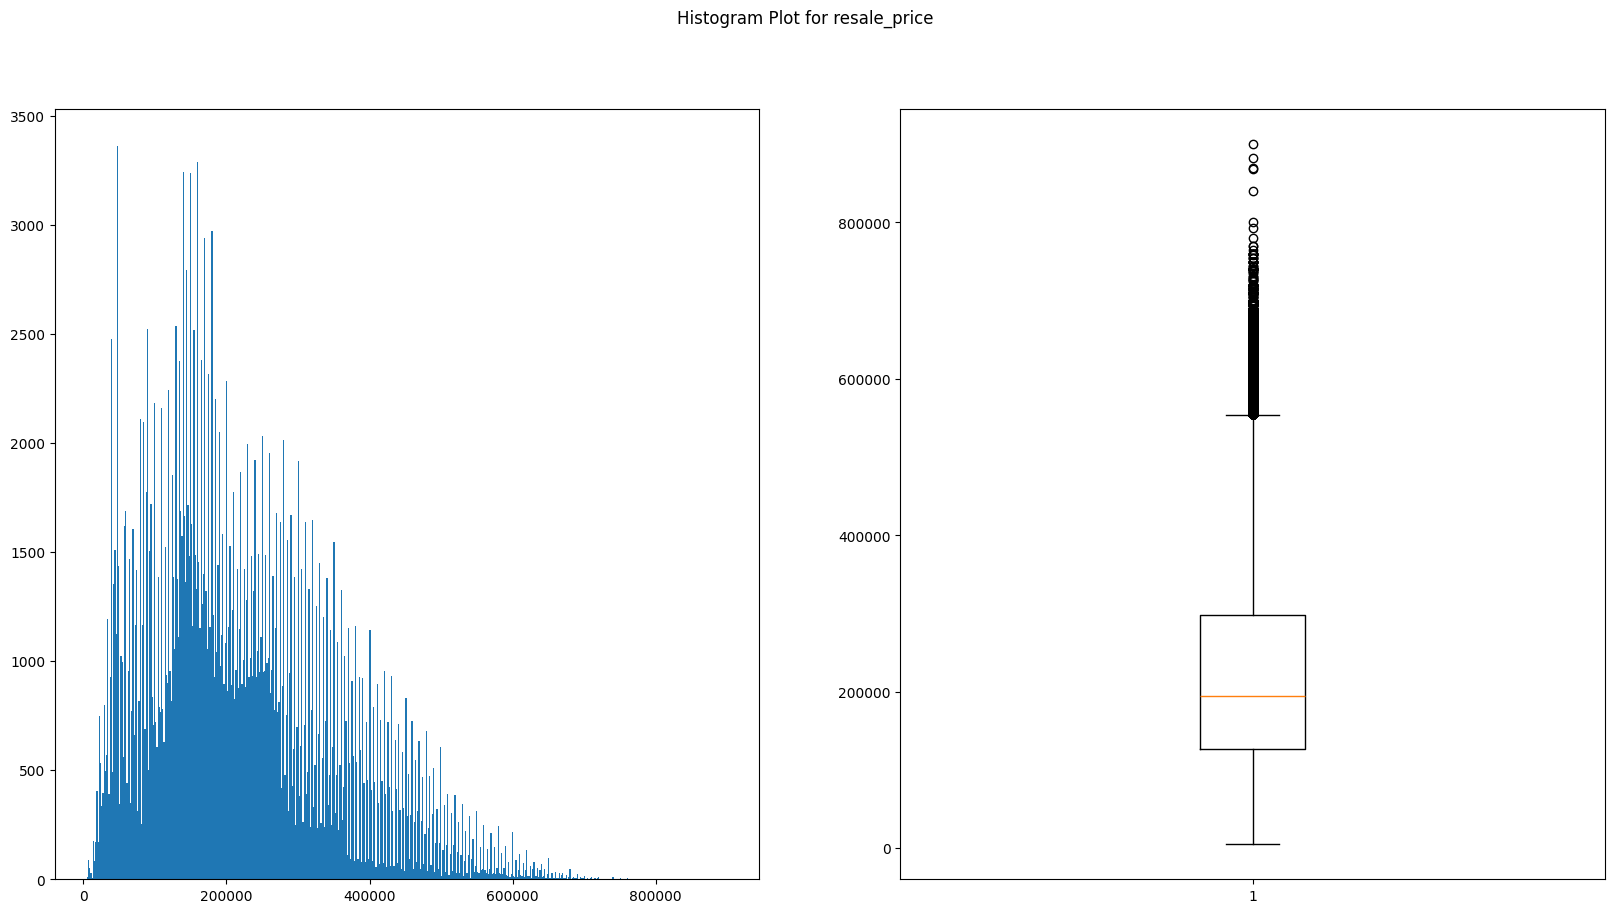

Mean: 6.60632948521863, Median: 7.0, Mode: 0    7
Name: month_only, dtype: int32, Min: 1, Max: 12
Skewness: -0.04505697783042942
Kurtosis: -1.1999154353896386
Variance: 11.790873326658215
Standard Deviation: 3.4337841118303016
Range: 11
Interquartile Range: 6.0


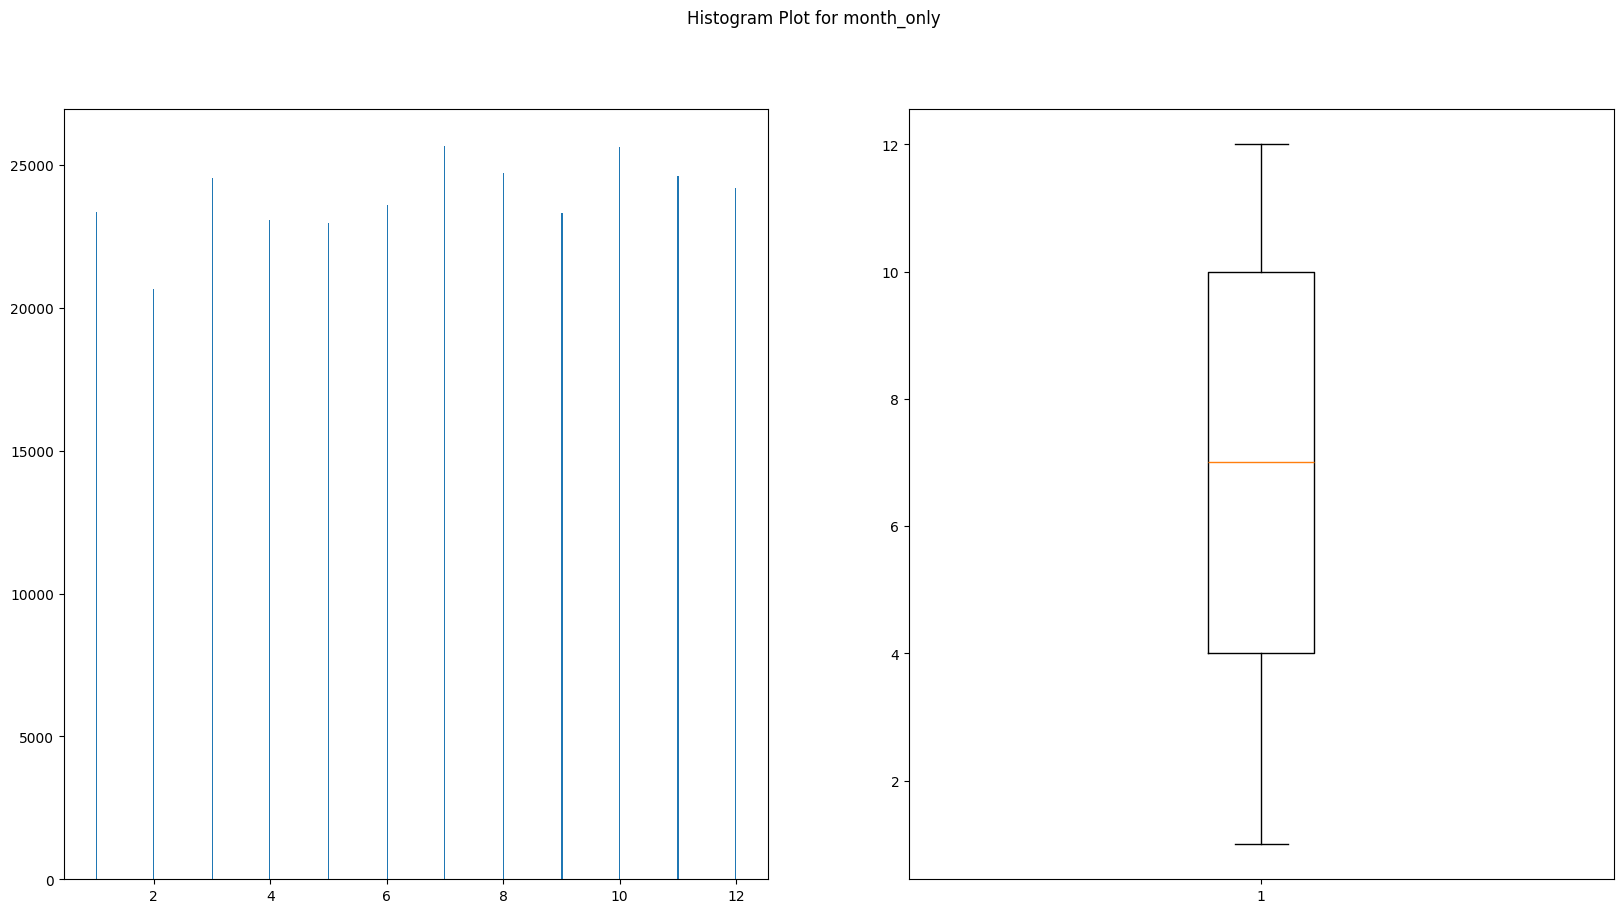

Mean: 1995.9164588964081, Median: 1996.0, Mode: 0    1999
Name: year_only, dtype: int32, Min: 1990, Max: 1999
Skewness: -0.6266468722509995
Kurtosis: -0.6730323835386733
Variance: 7.1416975854485925
Standard Deviation: 2.672395476992242
Range: 9
Interquartile Range: 4.0


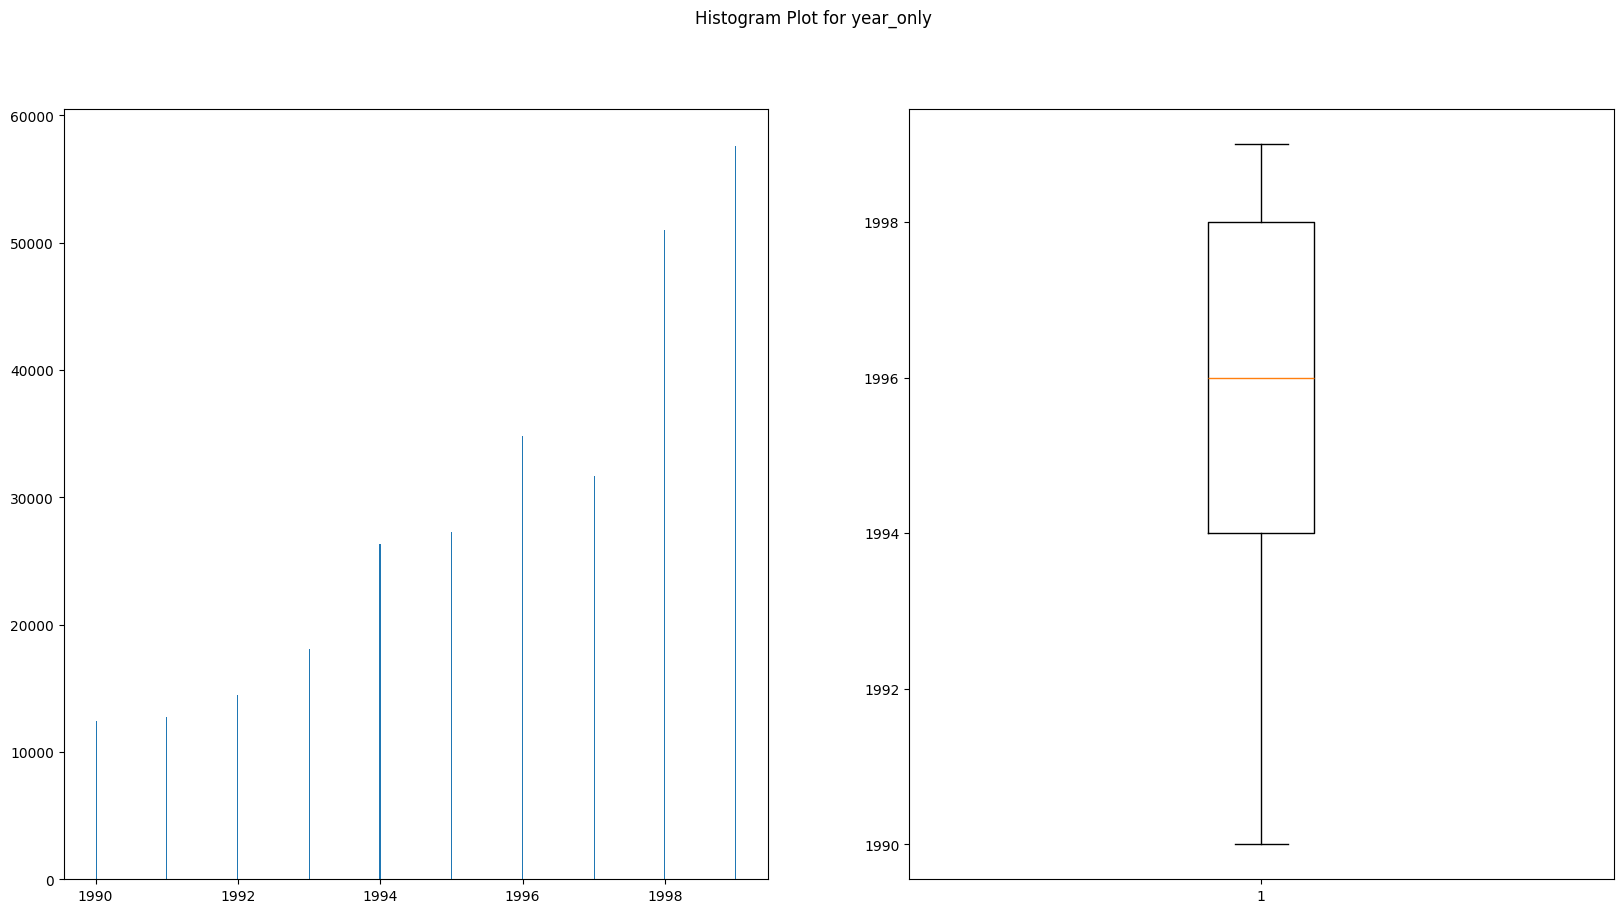

Mean: 86.29684957433287, Median: 87.0, Mode: 0    89
Name: remaining_lease, dtype: int64, Min: 67, Max: 101
Skewness: -0.6023136420153798
Kurtosis: -0.15018238461441635
Variance: 35.92804076391965
Standard Deviation: 5.994000397390681
Range: 34
Interquartile Range: 9.0


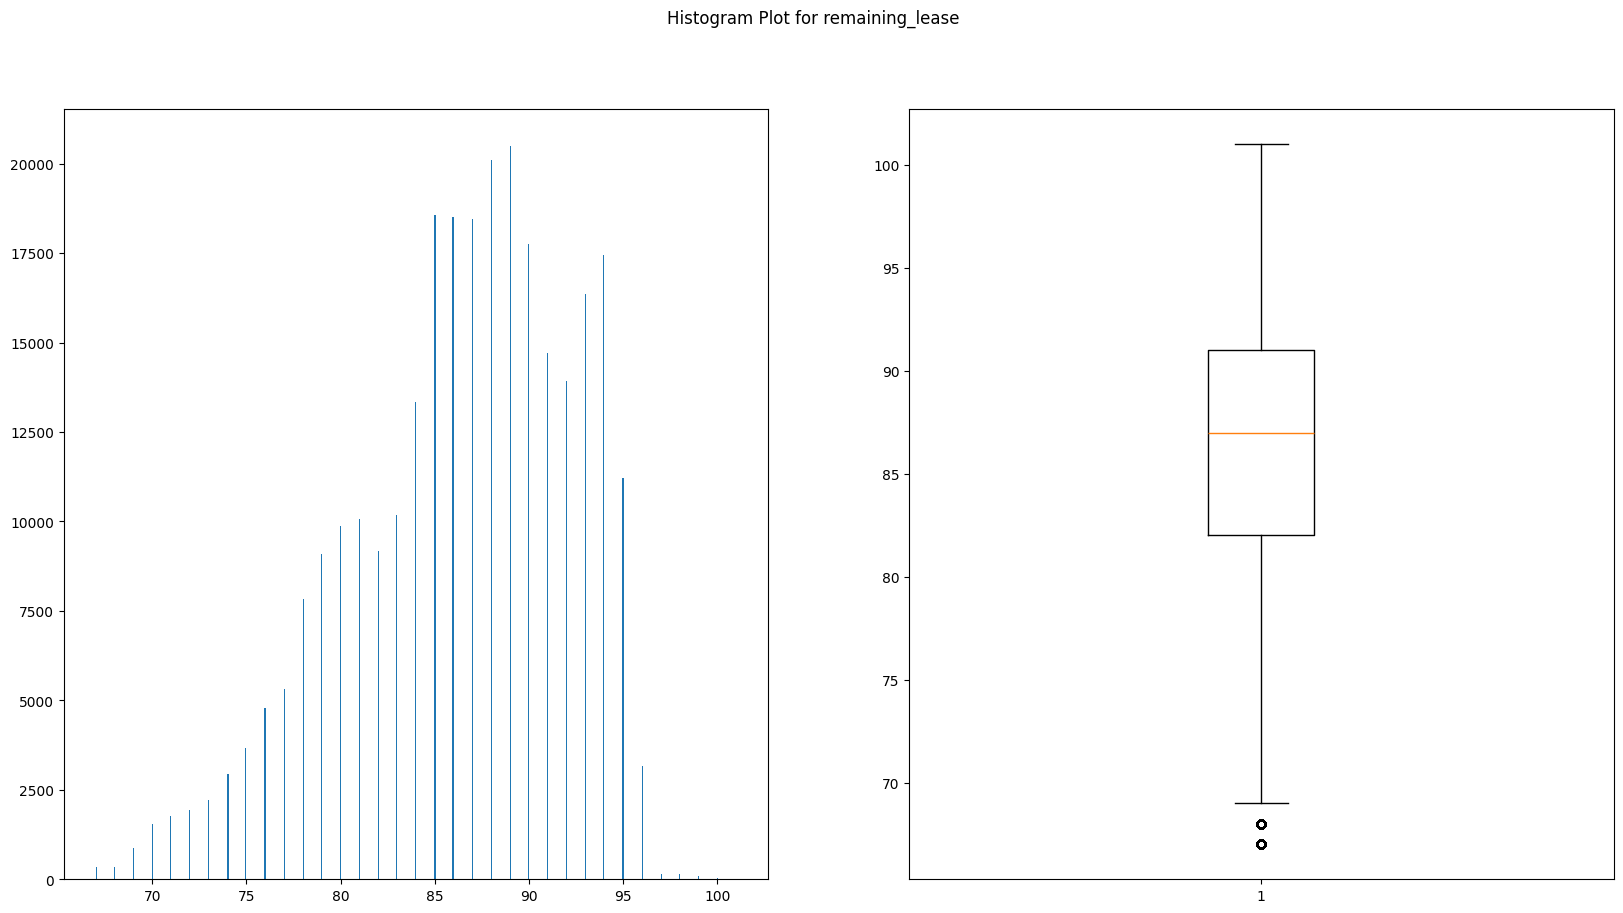

In [140]:
# plot histogram and boxplot for all continous features to check the distribution
for i, continous_features in enumerate(approval_date_1990_1999_df_numerical_features_list):
    if continous_features == 'month':
        pass
    else : 
        mean = approval_date_1990_1999_df_cleaned[continous_features].mean()
        median = approval_date_1990_1999_df_cleaned[continous_features].median() 
        Mode = approval_date_1990_1999_df_cleaned[continous_features].mode()
        min_val = approval_date_1990_1999_df_cleaned[continous_features].min()
        max_val = approval_date_1990_1999_df_cleaned[continous_features].max()
        
        print(f'Mean: {mean}, Median: {median}, Mode: {Mode}, Min: {min_val}, Max: {max_val}')
        print(f'Skewness: {approval_date_1990_1999_df_cleaned[continous_features].skew()}')
        print(f'Kurtosis: {approval_date_1990_1999_df_cleaned[continous_features].kurt()}')
        print(f'Variance: {approval_date_1990_1999_df_cleaned[continous_features].var()}')
        print(f'Standard Deviation: {approval_date_1990_1999_df_cleaned[continous_features].std()}')
        print(f'Range: {max_val - min_val}')
        print(f'Interquartile Range: {approval_date_1990_1999_df_cleaned[continous_features].quantile(0.75) - approval_date_1990_1999_df_cleaned[continous_features].quantile(0.25)}')
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        values_counts = approval_date_1990_1999_df_cleaned[continous_features].value_counts().sum()
        fig.suptitle(f'Histogram Plot for {continous_features}')
        ax1.hist(approval_date_1990_1999_df_cleaned[continous_features], bins=int(np.round(math.sqrt(values_counts))))
        ax2.boxplot(approval_date_1990_1999_df_cleaned[continous_features])
        plt.show()

### Plot Bar plot for groupby for approval_date_1990_1999_df_cleaned

#### Question 1 : How resale price is affected by floor range ?


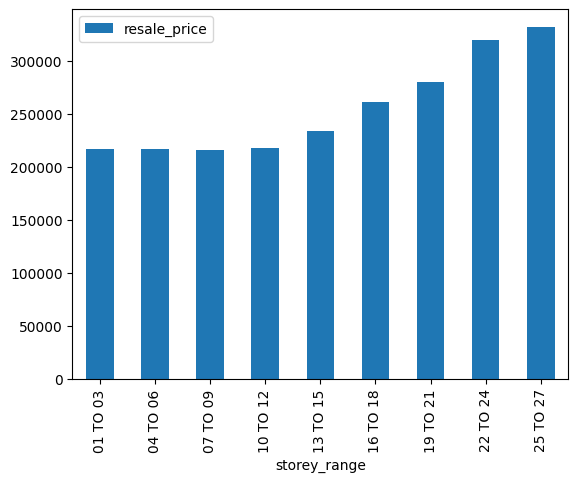

In [101]:
# How resale price is affected by floor range ?
approval_date_1990_1999_df_cleaned_resale_price_floor_range = approval_date_1990_1999_df_cleaned.groupby('storey_range')['resale_price',].mean()
approval_date_1990_1999_df_cleaned_resale_price_floor_range.plot(kind='bar', stacked=True)
plt.show()

Observation 
- As the storey range increases, the resale price tends to increase as well

#### Question 2 : How resale price is affected by flat type ?


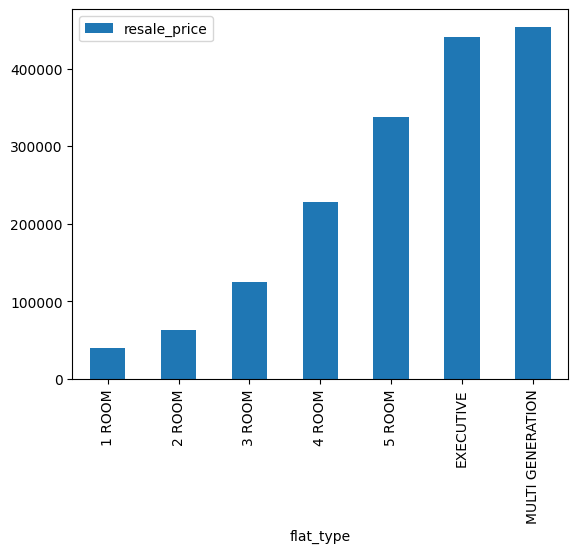

In [102]:
# How resale price is affected by flat type?
approval_date_1990_1999_df_cleaned_resale_price_flat_type = approval_date_1990_1999_df_cleaned.groupby('flat_type')['resale_price',].mean()
approval_date_1990_1999_df_cleaned_resale_price_flat_type.plot(kind='bar', stacked=True)
plt.show()

Observation
- General trend is as the flat gets bigger, the resale price is higher

#### Question 3 : How resale price is affected by flat model ?


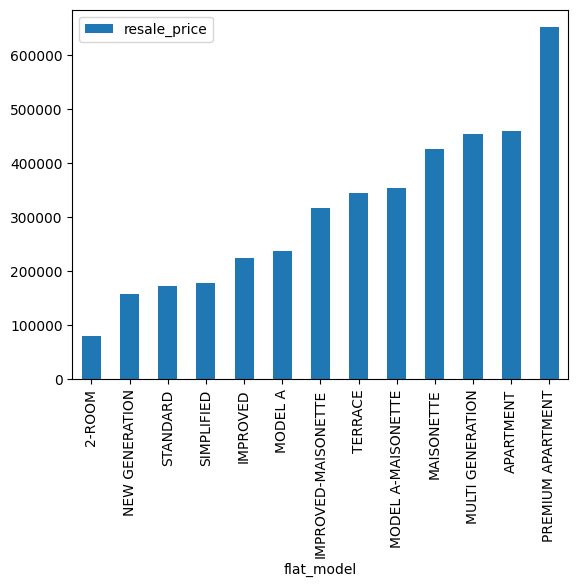

In [104]:
# How resale price is affected by flat model?
approval_date_1990_1999_df_cleaned_resale_price_flat_model = approval_date_1990_1999_df_cleaned.groupby('flat_model')['resale_price',].mean().sort_values(by='resale_price')
approval_date_1990_1999_df_cleaned_resale_price_flat_model.plot(kind='bar', stacked=True)
plt.show()

#### Question 4 : How floor area affected by flat_model ?

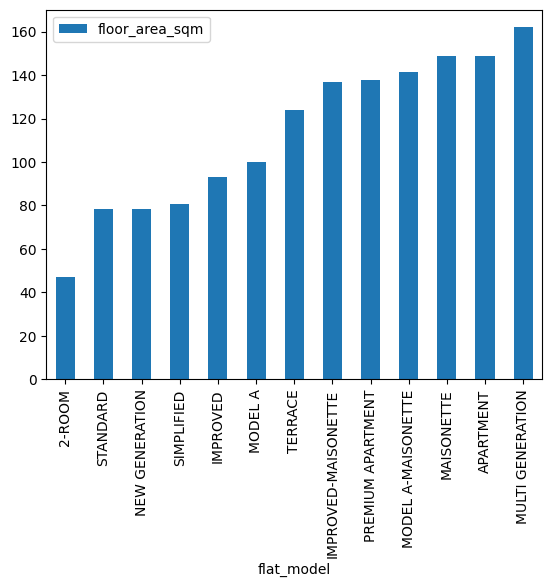

In [105]:
# How floor area is affected by flat model?
approval_date_1990_1999_df_cleaned_resale_price_flat_model_floor_area = approval_date_1990_1999_df_cleaned.groupby('flat_model')['floor_area_sqm',].mean().sort_values(by='floor_area_sqm')
approval_date_1990_1999_df_cleaned_resale_price_flat_model_floor_area.plot(kind='bar', stacked=True)
plt.show()

Observation
- General trend is follows resale_price vs flat_model. 
- As the floor area increases, the resale prices increases as wel.

#### Question 5 : How resale price is affected by remaining_lease ?

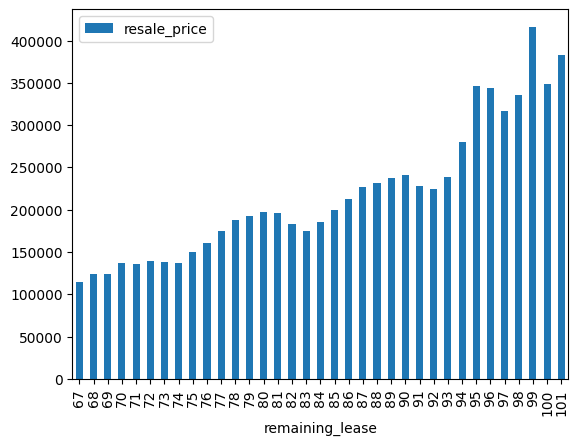

In [108]:
# How resale_price is affected by remaining_lease?
approval_date_1990_1999_df_cleaned_resale_price_remaining_lease = approval_date_1990_1999_df_cleaned.groupby('remaining_lease')['resale_price',].mean().sort_values(by='remaining_lease')
approval_date_1990_1999_df_cleaned_resale_price_remaining_lease.plot(kind='bar', stacked=True)
plt.show()

Observation
- Houses with higher remaining_lease are sold at a higher resale_price

#### Question 6 : How resale price is affected by town ?



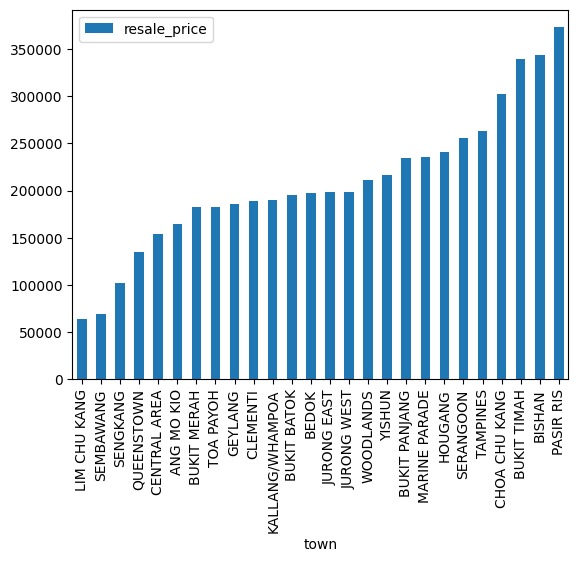

In [109]:
# How resale_price is affected by town?
approval_date_1990_1999_df_cleaned_resale_price_town = approval_date_1990_1999_df_cleaned.groupby('town')['resale_price',].mean().sort_values(by='resale_price')
approval_date_1990_1999_df_cleaned_resale_price_town.plot(kind='bar', stacked=True)
plt.show()

Observation 
- Certain town are sold at a higher resale_price compared to other town.

#### Question 7 : What is the mean remaining_lease in each town ?

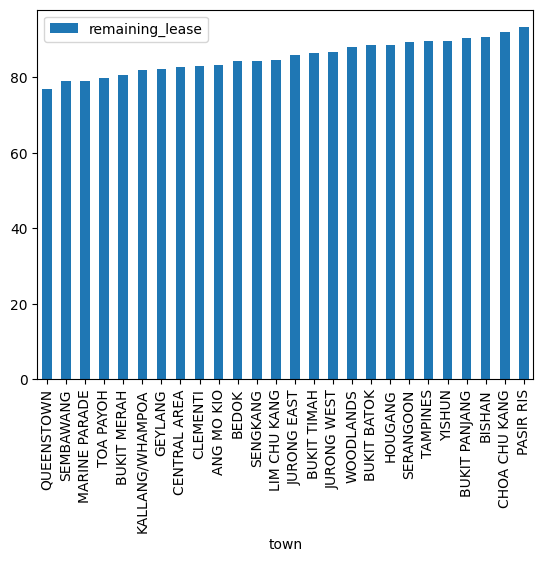

In [111]:
# How resale_price is affected by town?
approval_date_1990_1999_df_cleaned_remaining_lease_town = approval_date_1990_1999_df_cleaned.groupby('town')['remaining_lease',].mean().sort_values(by='remaining_lease')
approval_date_1990_1999_df_cleaned_remaining_lease_town.plot(kind='bar', stacked=True)
plt.show()

Observation 
- Most town with higher remaining lease tend to be sold at a higher resale_price. However, there are towns such as Lim Chu kang with high remaining lease with a low resale price.
- Lim Chu Kang is known for cemetries hence could be a reason 

## 2. Content Investigation, Quality Checks and Distribution checks
- approval_date_2000_feb_2012_df_cleaned


In [81]:
approval_date_2000_feb_2012_df_cleaned

# Get the columns in list
approval_date_2000_feb_2012_df_cleaned_columns = approval_date_2000_feb_2012_df_cleaned.columns
#Get categorical features list 
approval_date_2000_feb_2012_df_cleaned_cat_features_list =[feature for feature in approval_date_2000_feb_2012_df_cleaned_columns if approval_date_2000_feb_2012_df_cleaned[feature].dtypes == 'O']

In [84]:
approval_date_2000_feb_2012_df_cleaned_cat_features_list

['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

In [83]:
#Get all the numerical featues
approval_date_2000_feb_2012_df_numerical_features_list =[feature for feature in approval_date_2000_feb_2012_df_cleaned_columns if approval_date_2000_feb_2012_df_cleaned[feature].dtypes != 'O']
approval_date_2000_feb_2012_df_numerical_features_list

['month',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'month_only',
 'year_only',
 'remaining_lease']

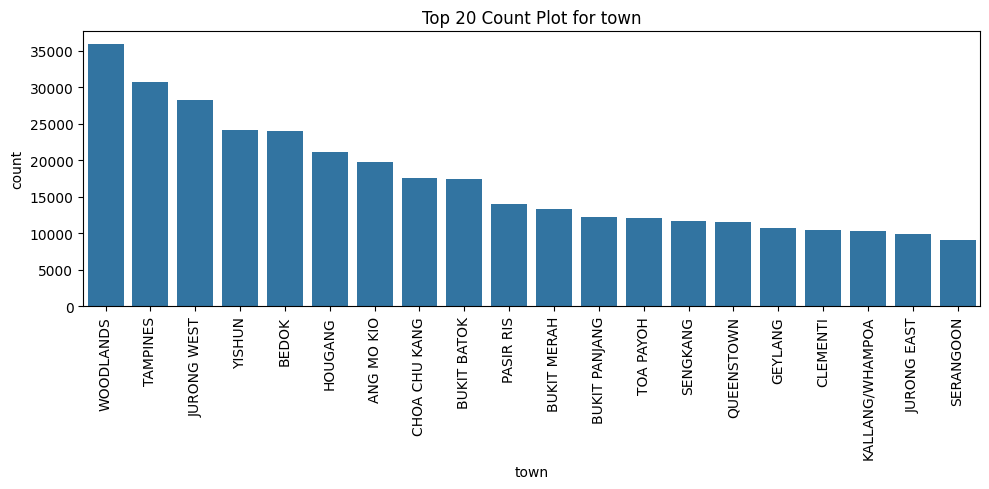

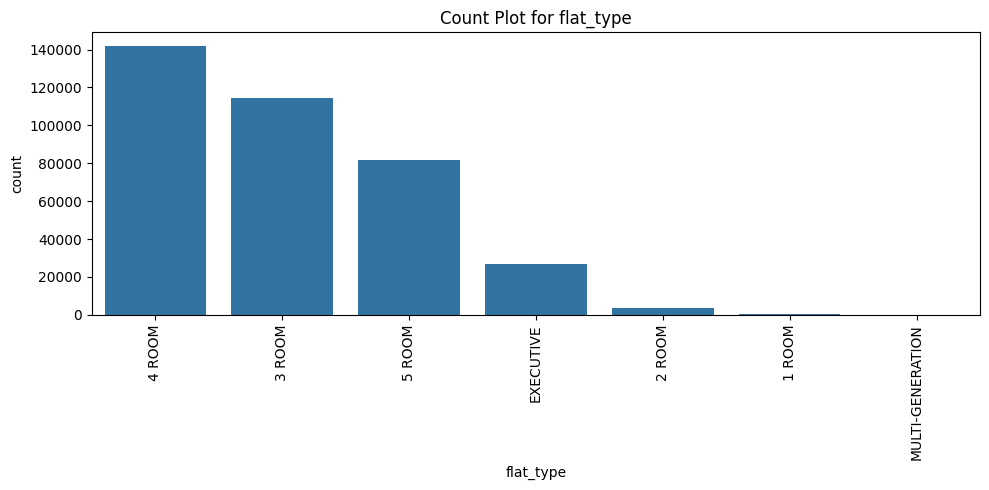

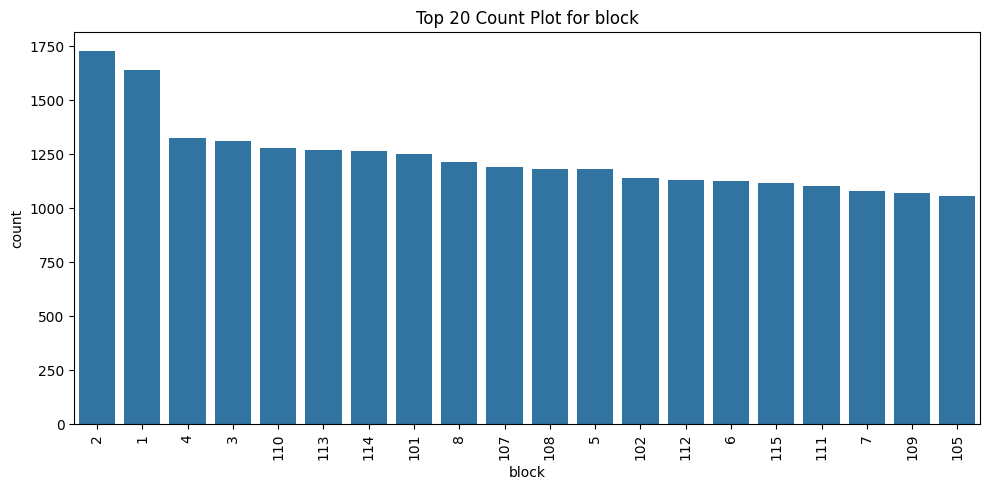

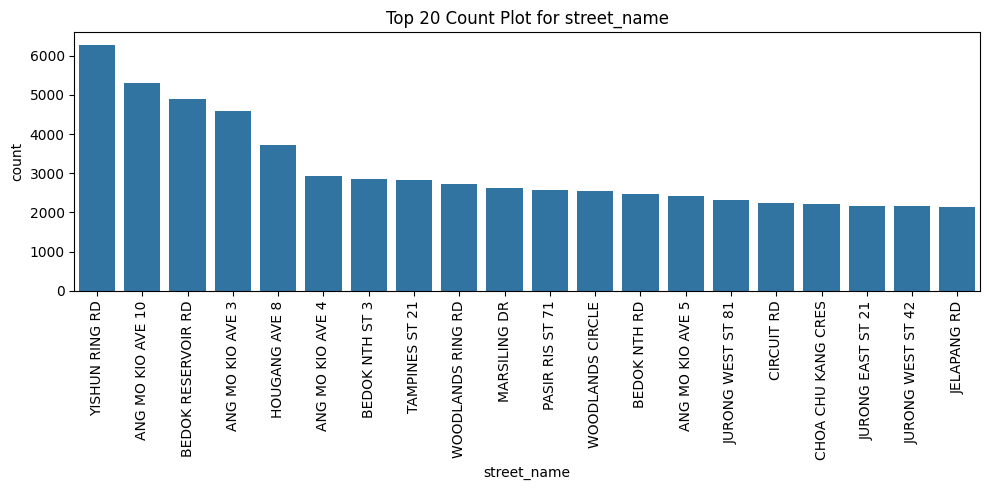

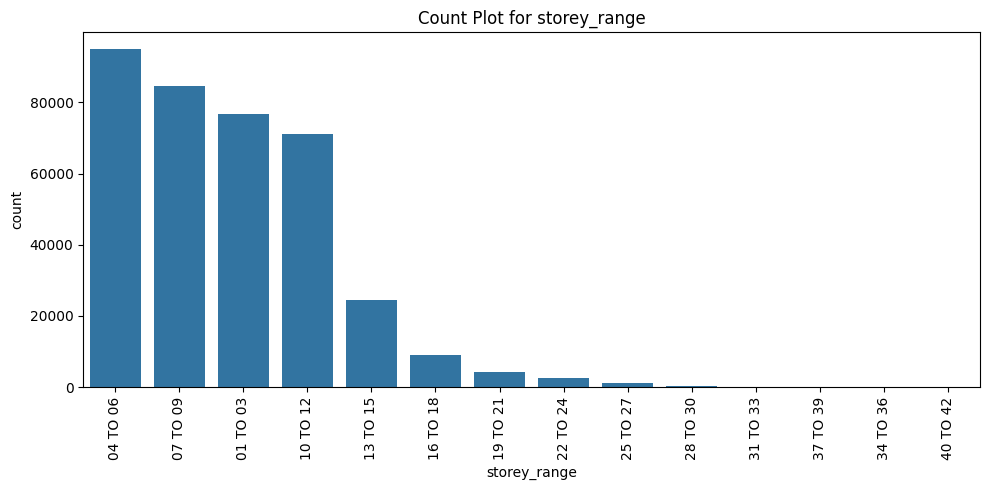

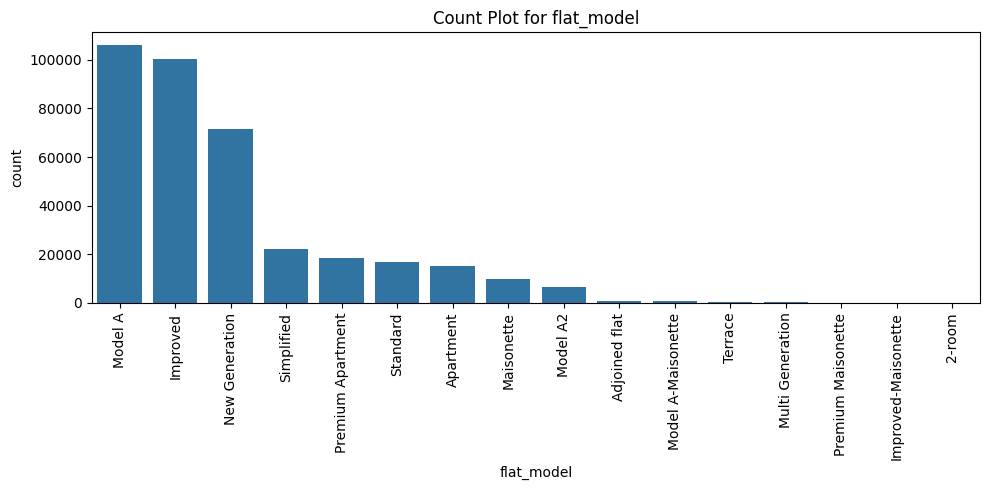

In [141]:
TOP_N = 20

for cat_columns in approval_date_2000_feb_2012_df_cleaned_cat_features_list:
    
    counts = approval_date_2000_feb_2012_df_cleaned[cat_columns].value_counts()
    n_unique = counts.shape[0]

    plt.figure(figsize=(10, 5))

    if n_unique > TOP_N:
        top_categories = counts.head(TOP_N).index

        sns.countplot(
            x=cat_columns,
            data=approval_date_2000_feb_2012_df_cleaned[
                approval_date_2000_feb_2012_df_cleaned[cat_columns].isin(top_categories)
            ],
            order=top_categories
        )
        plt.title(f'Top {TOP_N} Count Plot for {cat_columns}')
    else:
        sns.countplot(
            x=cat_columns,
            data=approval_date_2000_feb_2012_df_cleaned,
            order=counts.index
        )
        plt.title(f'Count Plot for {cat_columns}')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Print counts
    # print(counts)
    # print("Total count:", counts.sum())


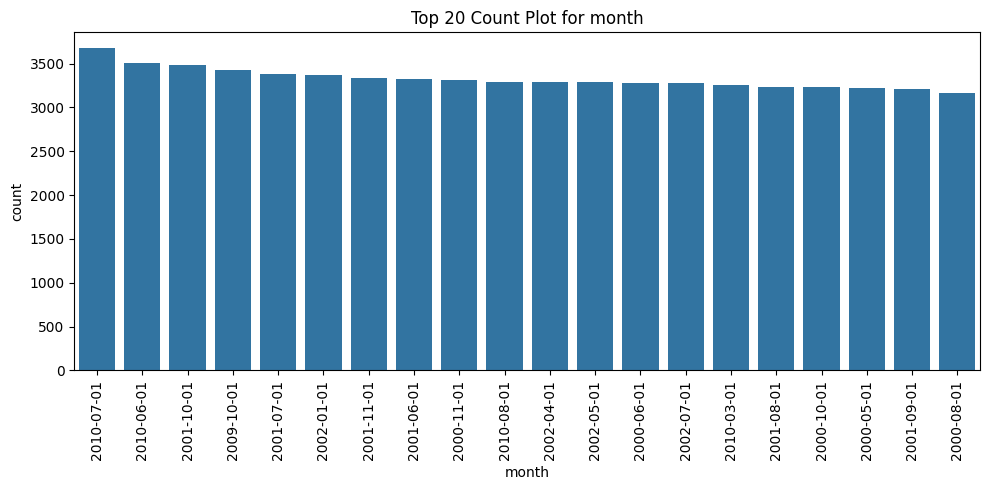

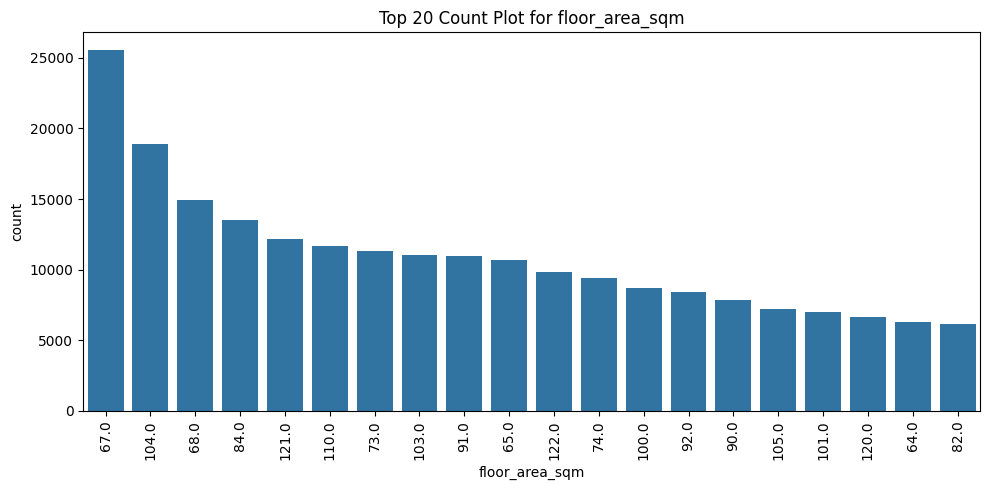

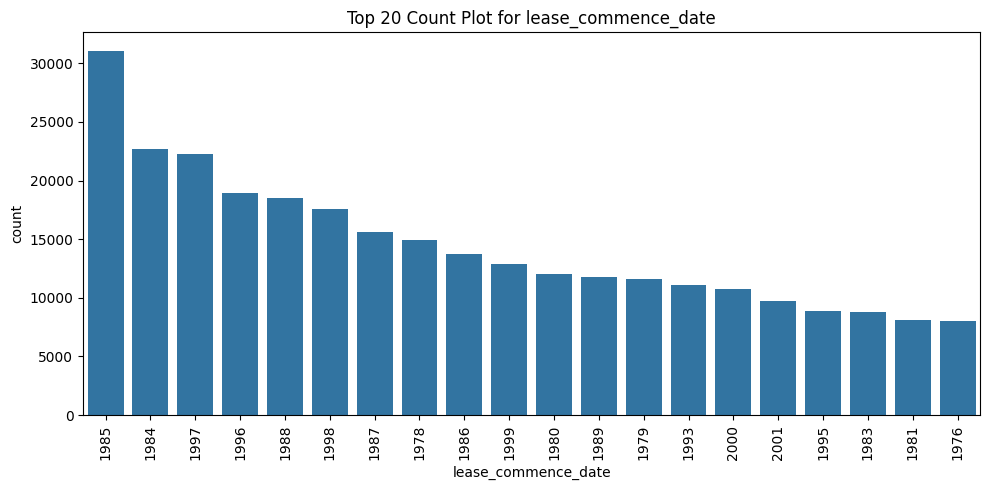

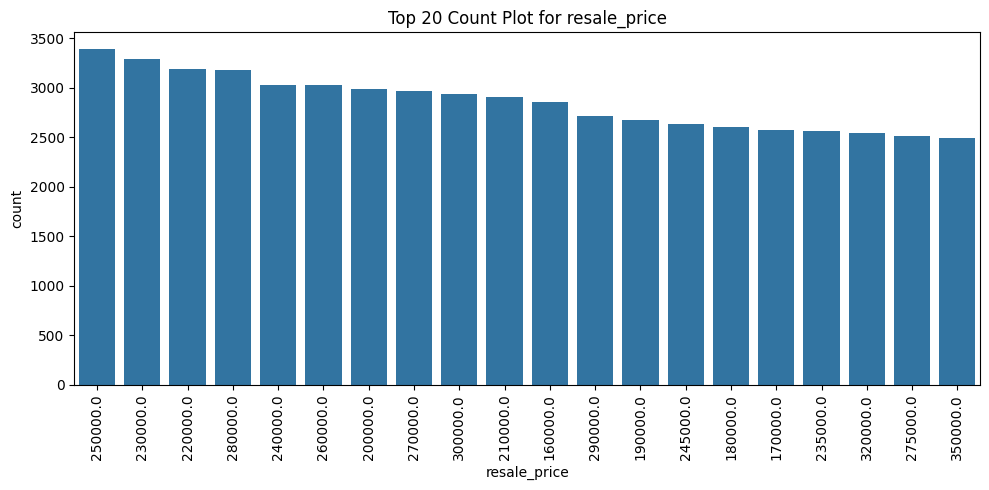

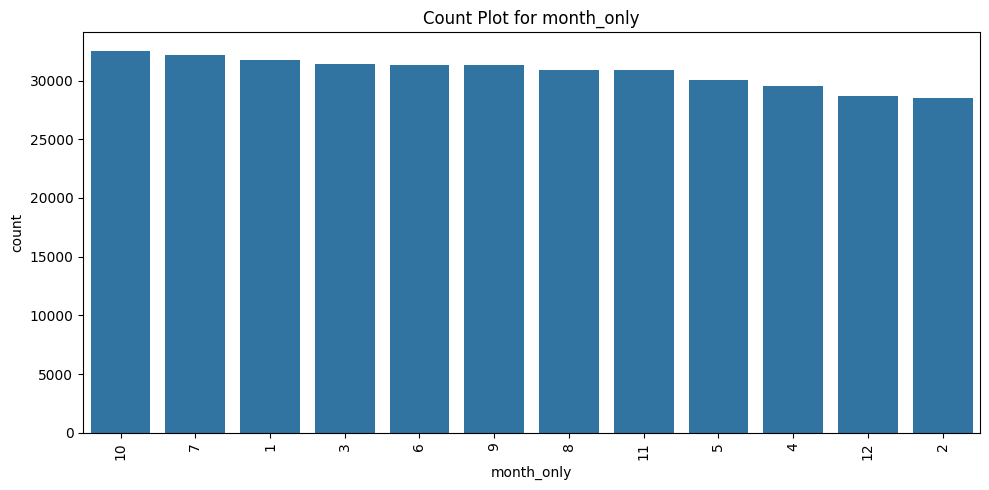

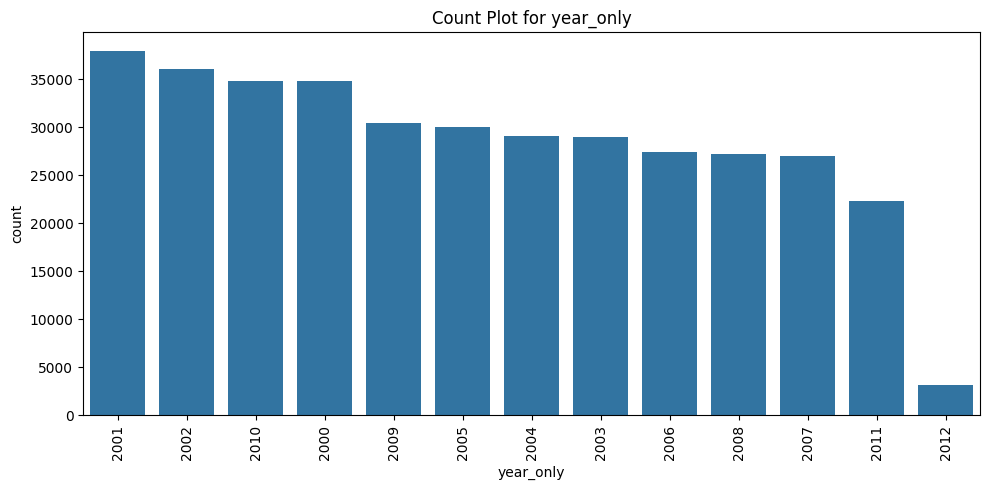

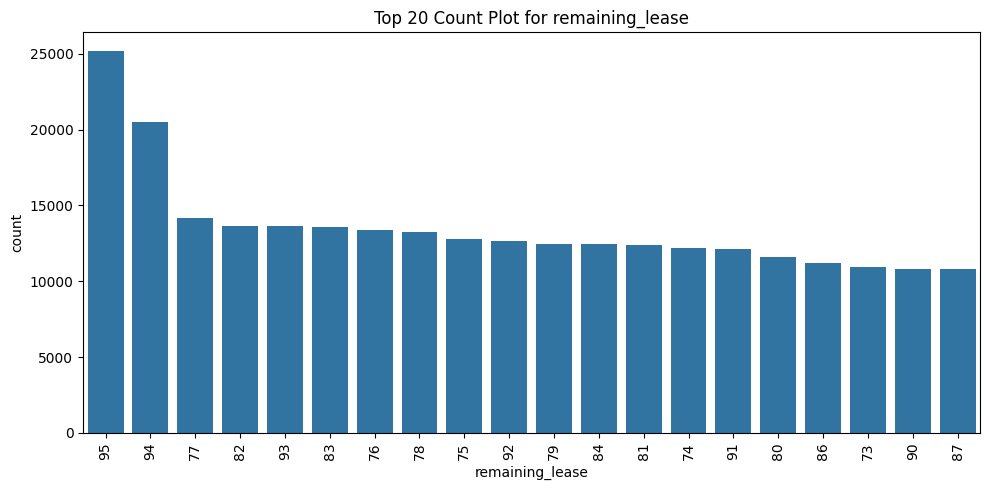

In [142]:
TOP_N = 20

for cat_columns in approval_date_2000_feb_2012_df_numerical_features_list:
    
    counts = approval_date_2000_feb_2012_df_cleaned[cat_columns].value_counts()
    n_unique = counts.shape[0]

    plt.figure(figsize=(10, 5))

    if n_unique > TOP_N:
        top_categories = counts.head(TOP_N).index

        sns.countplot(
            x=cat_columns,
            data=approval_date_2000_feb_2012_df_cleaned[
                approval_date_2000_feb_2012_df_cleaned[cat_columns].isin(top_categories)
            ],
            order=top_categories
        )
        plt.title(f'Top {TOP_N} Count Plot for {cat_columns}')
    else:
        sns.countplot(
            x=cat_columns,
            data=approval_date_2000_feb_2012_df_cleaned,
            order=counts.index
        )
        plt.title(f'Count Plot for {cat_columns}')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Print counts
    # print(counts)
    # print("Total count:", counts.sum())


### Plot Histogram for numercial variables

Mean: 96.60483288092799, Median: 100.0, Mode: 0    67.0
Name: floor_area_sqm, dtype: float64, Min: 28.0, Max: 297.0
Skewness: 0.3101916805684424
Kurtosis: -0.3654744613862215
Variance: 655.1973980341727
Standard Deviation: 25.59682398334162
Range: 269.0
Interquartile Range: 42.0


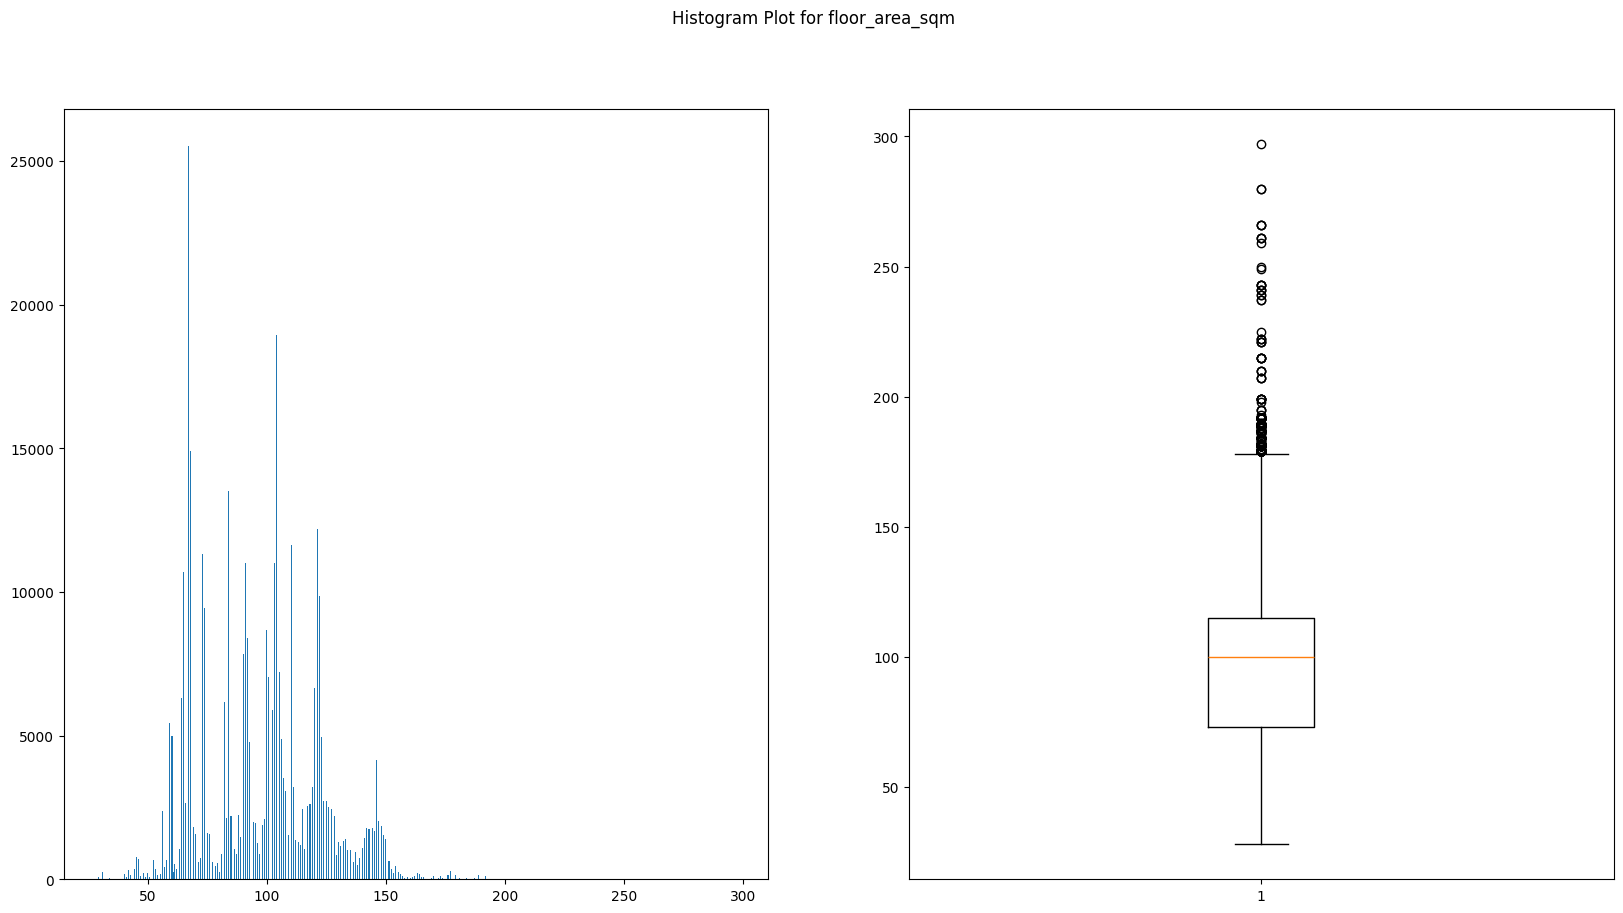

Mean: 1987.9874897734724, Median: 1987.0, Mode: 0    1985
Name: lease_commence_date, dtype: int64, Min: 1966, Max: 2012
Skewness: -0.10911002102863526
Kurtosis: -0.881343333132607
Variance: 83.2016141101377
Standard Deviation: 9.121491879628994
Range: 46
Interquartile Range: 16.0


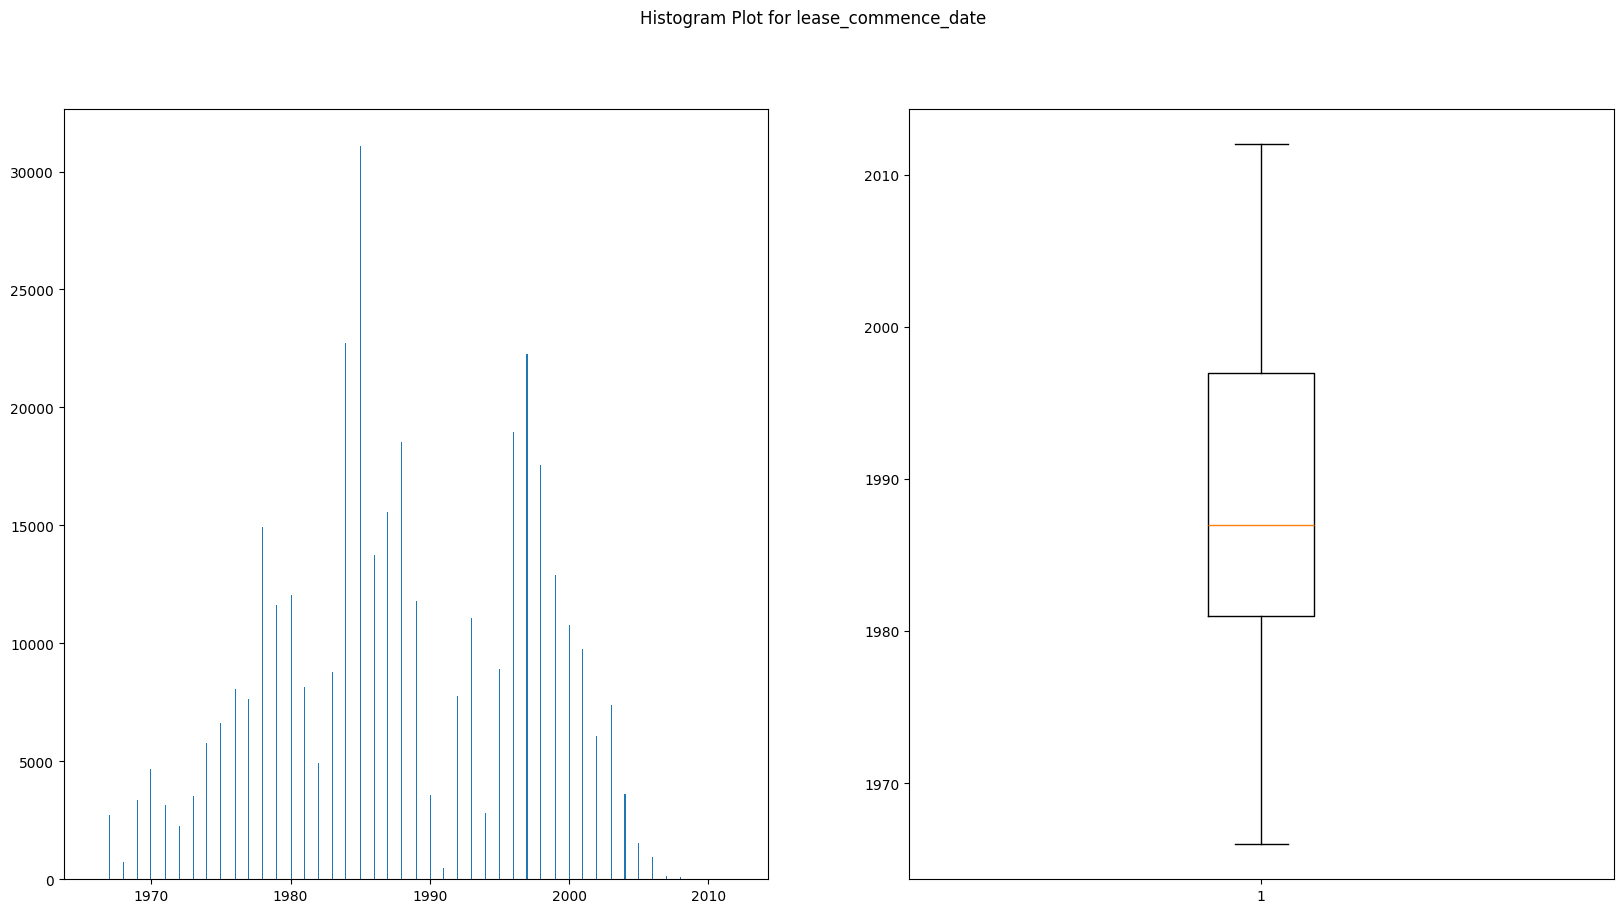

Mean: 281353.9788618078, Median: 263000.0, Mode: 0    250000.0
Name: resale_price, dtype: float64, Min: 28000.0, Max: 903000.0
Skewness: 0.867999600842387
Kurtosis: 0.8428681608893926
Variance: 12572051248.794394
Standard Deviation: 112125.15885738755
Range: 875000.0
Interquartile Range: 155000.0


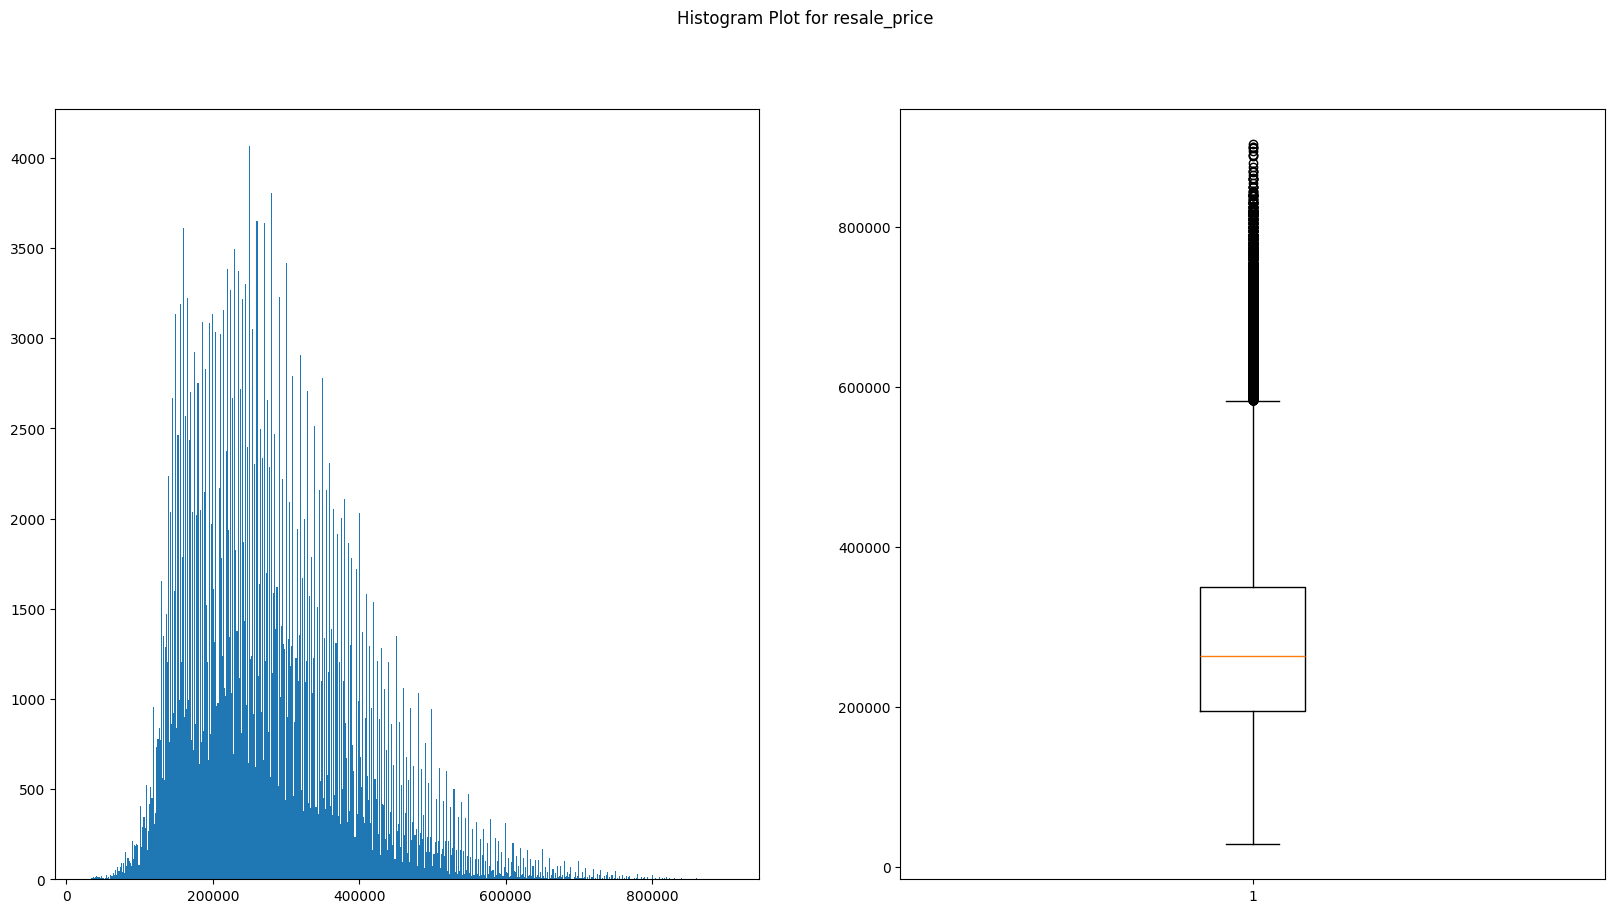

Mean: 6.5107304043474254, Median: 7.0, Mode: 0    10
Name: month_only, dtype: int32, Min: 1, Max: 12
Skewness: -0.02355587640852806
Kurtosis: -1.204056766084731
Variance: 11.777632686152781
Standard Deviation: 3.4318555747806143
Range: 11
Interquartile Range: 5.0


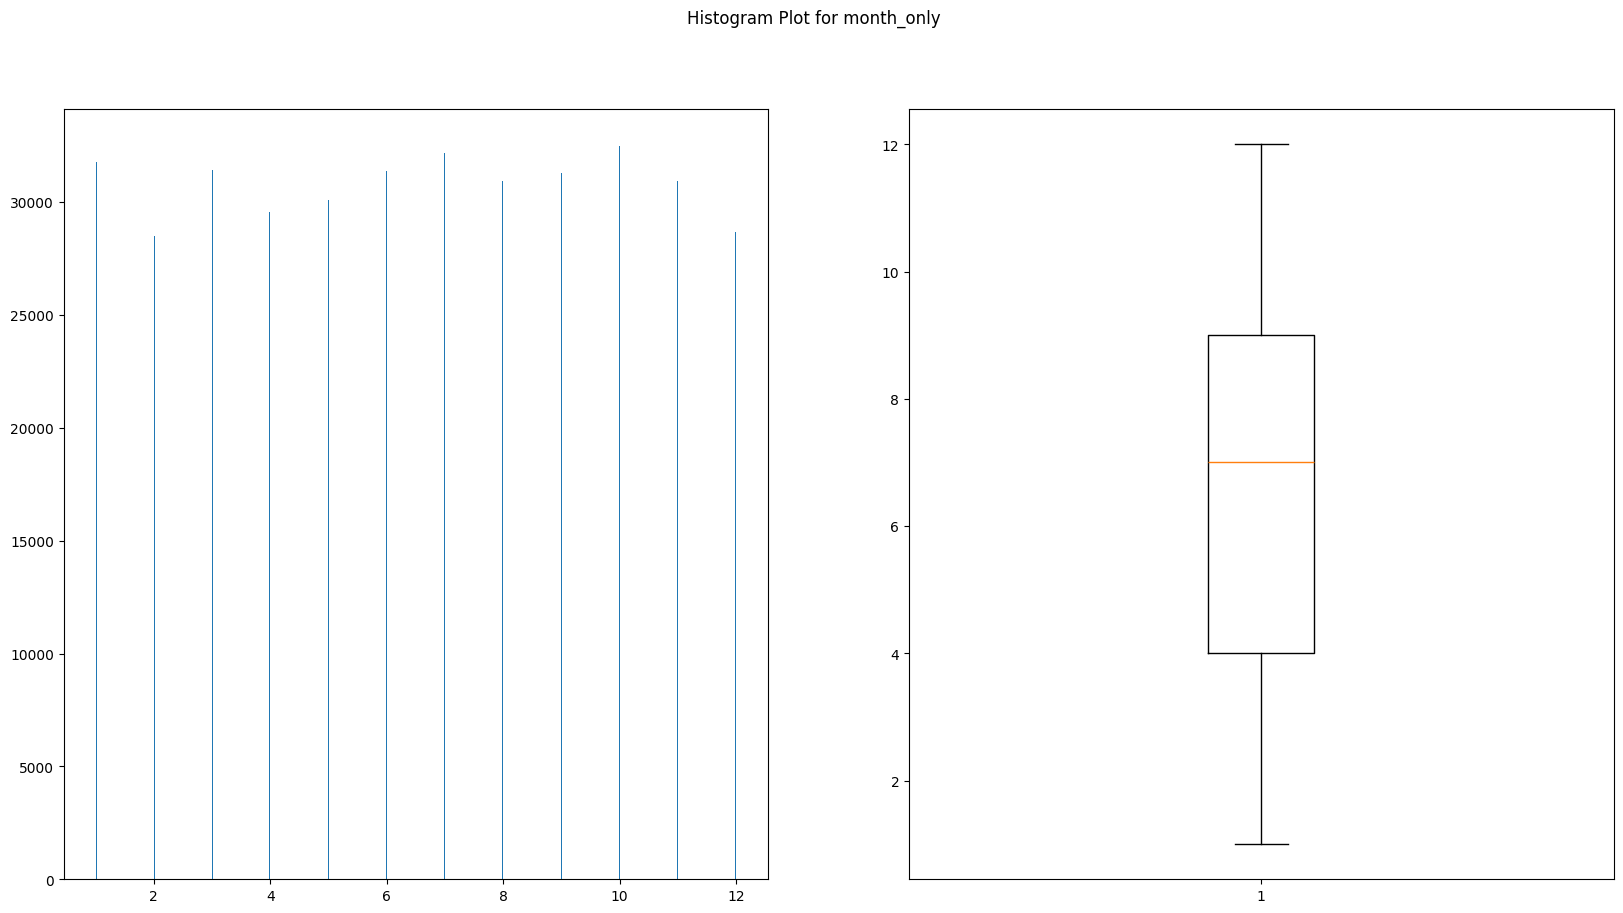

Mean: 2005.2541732360255, Median: 2005.0, Mode: 0    2001
Name: year_only, dtype: int32, Min: 2000, Max: 2012
Skewness: 0.10046453534670194
Kurtosis: -1.2666662298206866
Variance: 12.509949412087932
Standard Deviation: 3.536940685407084
Range: 12
Interquartile Range: 6.0


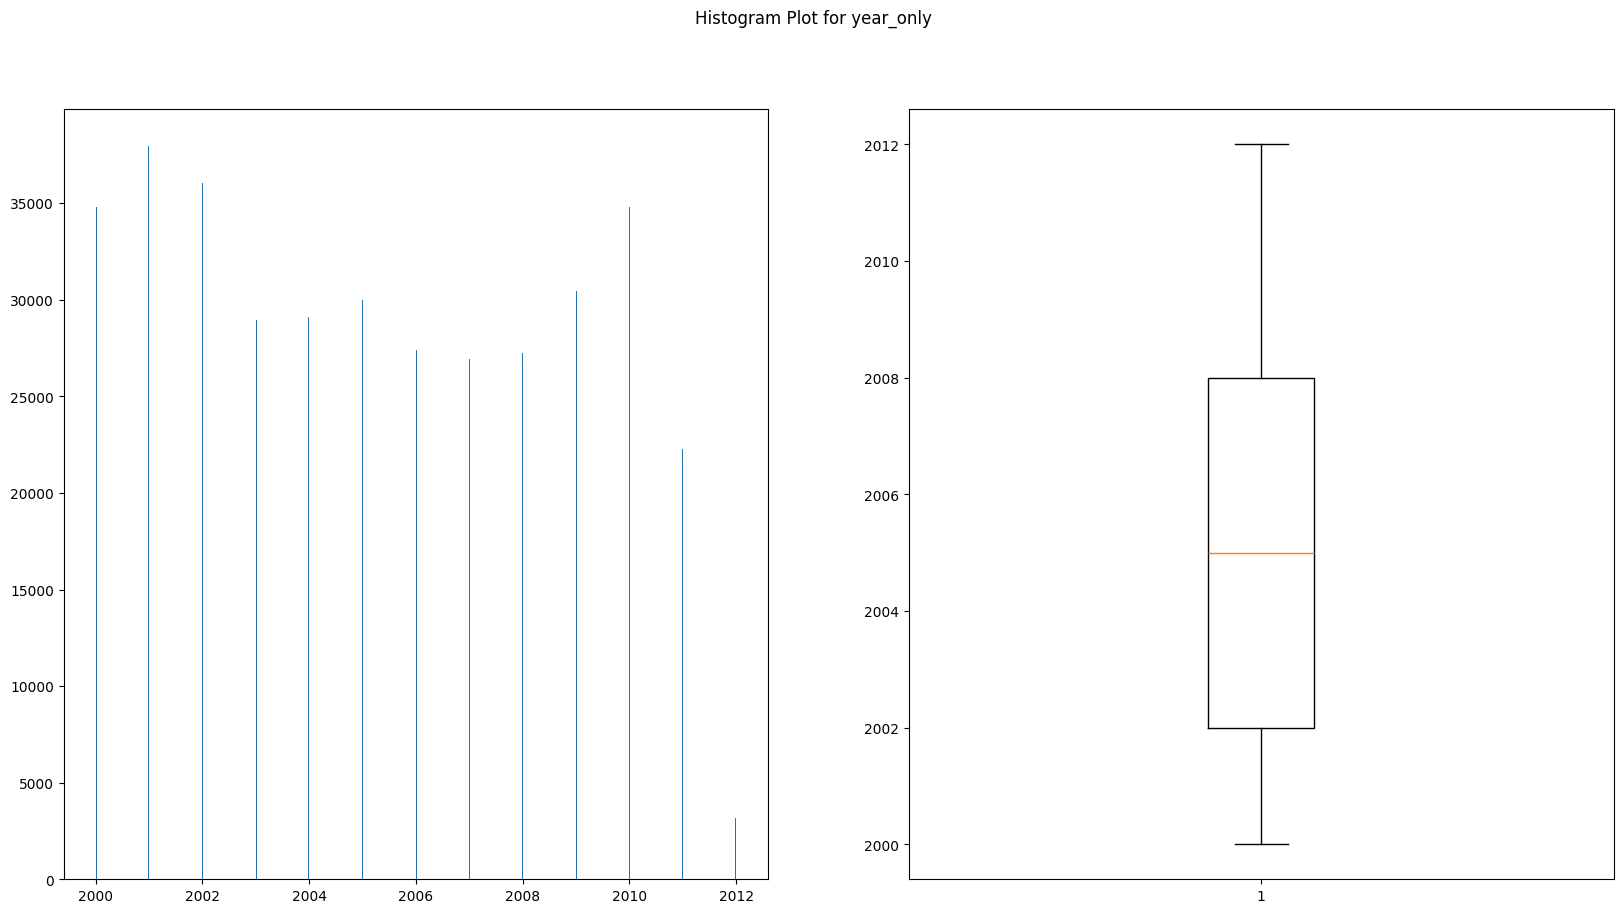

Mean: 81.7333165374467, Median: 82.0, Mode: 0    95
Name: remaining_lease, dtype: int64, Min: 54, Max: 101
Skewness: -0.28810745367318763
Kurtosis: -0.7870049595084581
Variance: 87.62379788505586
Standard Deviation: 9.36075840330557
Range: 47
Interquartile Range: 15.0


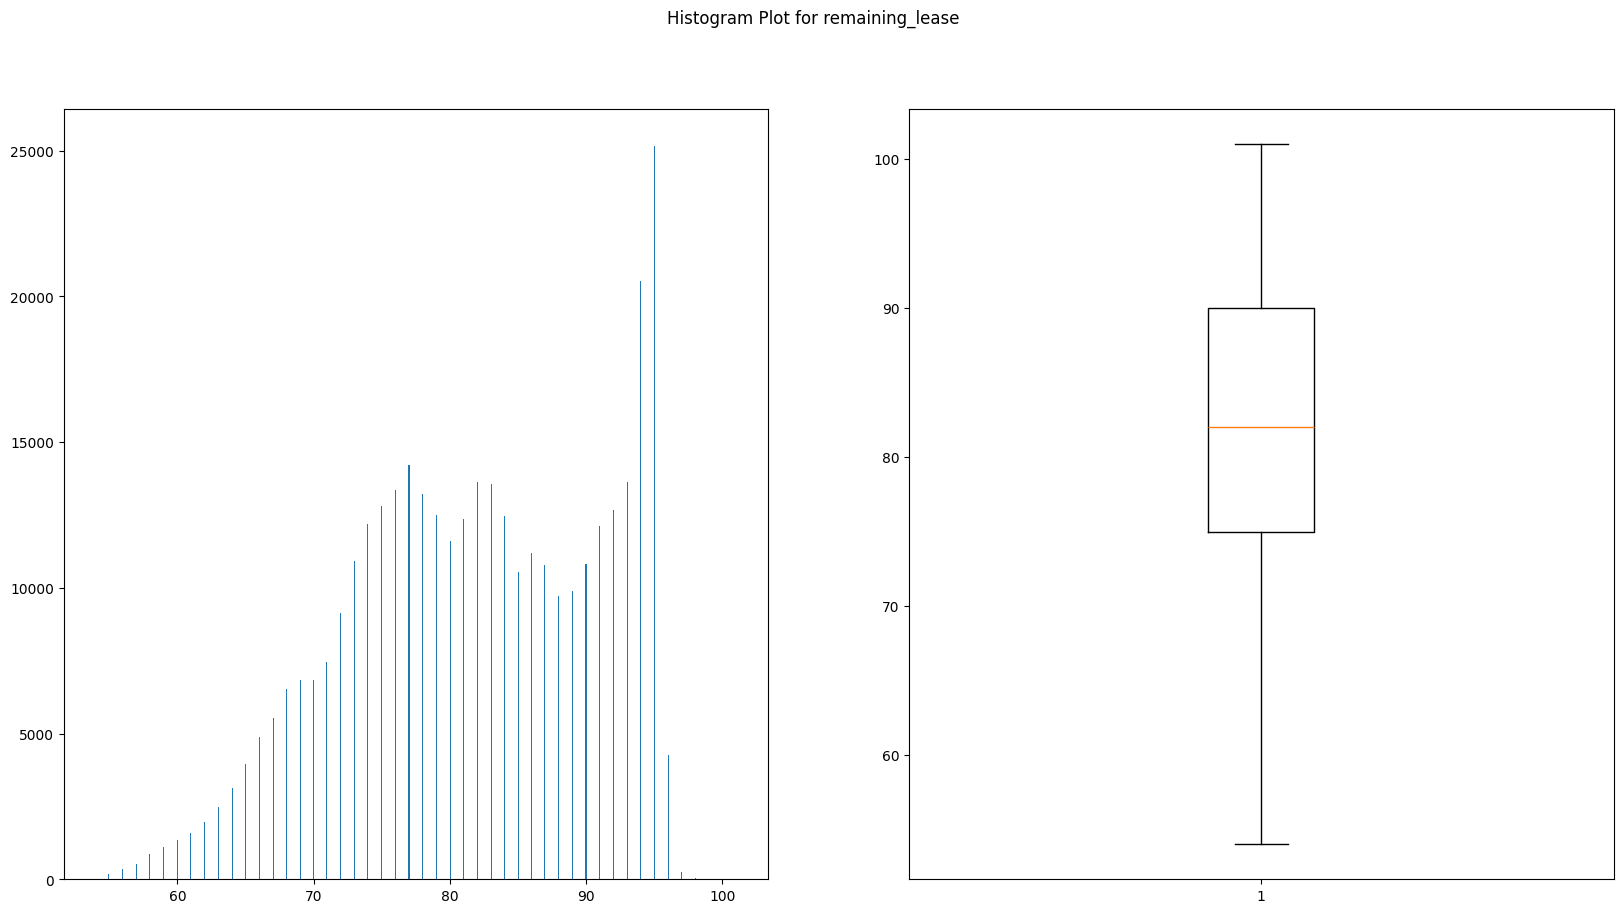

In [143]:
# plot histogram and boxplot for all continous features to check the distribution
for i, continous_features in enumerate(approval_date_2000_feb_2012_df_numerical_features_list):
    if continous_features == 'month':
        pass
    else : 
        mean = approval_date_2000_feb_2012_df_cleaned[continous_features].mean()
        median = approval_date_2000_feb_2012_df_cleaned[continous_features].median() 
        Mode = approval_date_2000_feb_2012_df_cleaned[continous_features].mode()
        min_val = approval_date_2000_feb_2012_df_cleaned[continous_features].min()
        max_val = approval_date_2000_feb_2012_df_cleaned[continous_features].max()
        
        print(f'Mean: {mean}, Median: {median}, Mode: {Mode}, Min: {min_val}, Max: {max_val}')
        print(f'Skewness: {approval_date_2000_feb_2012_df_cleaned[continous_features].skew()}')
        print(f'Kurtosis: {approval_date_2000_feb_2012_df_cleaned[continous_features].kurt()}')
        print(f'Variance: {approval_date_2000_feb_2012_df_cleaned[continous_features].var()}')
        print(f'Standard Deviation: {approval_date_2000_feb_2012_df_cleaned[continous_features].std()}')
        print(f'Range: {max_val - min_val}')
        print(f'Interquartile Range: {approval_date_2000_feb_2012_df_cleaned[continous_features].quantile(0.75) - approval_date_2000_feb_2012_df_cleaned[continous_features].quantile(0.25)}')
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        values_counts = approval_date_2000_feb_2012_df_cleaned[continous_features].value_counts().sum()
        fig.suptitle(f'Histogram Plot for {continous_features}')
        ax1.hist(approval_date_2000_feb_2012_df_cleaned[continous_features], bins=int(np.round(math.sqrt(values_counts))))
        ax2.boxplot(approval_date_2000_feb_2012_df_cleaned[continous_features])
        plt.show()

### Plot Bar plot for groupby for approval_date_2000_feb_2012_df_cleaned

#### Question 1 : How resale price is affected by floor range ?

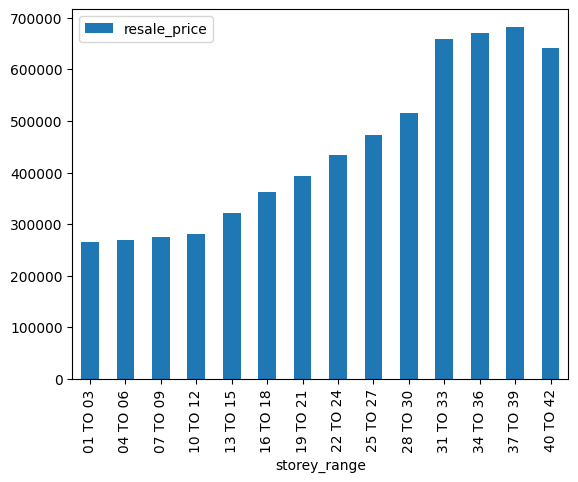

In [144]:
# How resale price is affected by floor range ?
approval_date_2000_feb_2012_df_cleaned_resale_price_floor_range = approval_date_2000_feb_2012_df_cleaned.groupby('storey_range')['resale_price',].mean()
approval_date_2000_feb_2012_df_cleaned_resale_price_floor_range.plot(kind='bar', stacked=True)
plt.show()

Observation 
- As the storey range increases, the resale price tends to increase as well
    
    - similar to approval_date_1990_1999_df_cleaned

#### Question 2 : How resale price is affected by flat type ?


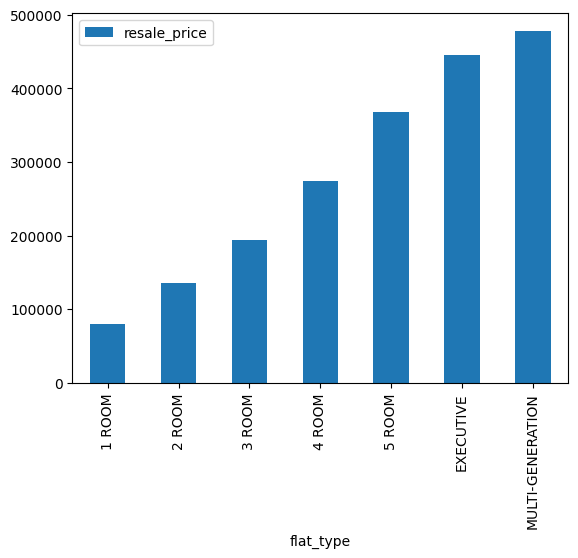

In [145]:
# How resale price is affected by flat type?
approval_date_2000_feb_2012_df_cleaned_resale_price_flat_type = approval_date_2000_feb_2012_df_cleaned.groupby('flat_type')['resale_price',].mean()
approval_date_2000_feb_2012_df_cleaned_resale_price_flat_type.plot(kind='bar', stacked=True)
plt.show()

Observation
- General trend is as the flat gets bigger, the resale price is higher
      
      -similar to approval_date_1990_1999_df_cleaned

#### Question 3 : How resale price is affected by flat model ?


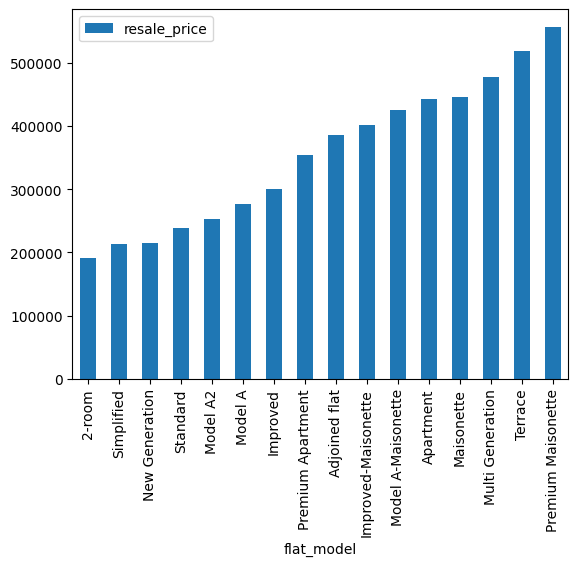

In [146]:
# How resale price is affected by flat model?
approval_date_2000_feb_2012_df_cleaned_resale_price_flat_model = approval_date_2000_feb_2012_df_cleaned.groupby('flat_model')['resale_price',].mean().sort_values(by='resale_price')
approval_date_2000_feb_2012_df_cleaned_resale_price_flat_model.plot(kind='bar', stacked=True)
plt.show()